# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN_IMP import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0008'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari()

## architecture

In [4]:
x_train.shape

(79998, 28, 28, 1)

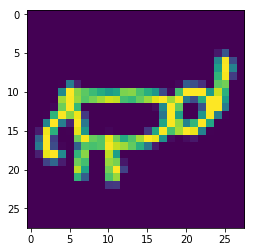

In [5]:
plt.imshow(x_train[0,:,:,0])

In [6]:
INPUT_DIM = (28,28,1)

CONV_FILTERS = [64,64,128, 256]
CONV_KERNEL_SIZES = [4,4,4,4]
CONV_STRIDES = [2,2,2,1]
CONV_PADDINGS = ['same', 'same', 'same', 'same']

CONV_T_FILTERS = [128,64,1]
CONV_T_KERNEL_SIZES = [4,4,4]
CONV_T_STRIDES = [1,2,2]
CONV_T_PADDINGS = ['same','same','same']

Z_DIM = 100


In [7]:
gan = GAN(INPUT_DIM
                , CONV_FILTERS
                , CONV_KERNEL_SIZES
                , CONV_STRIDES
                , CONV_PADDINGS
                , CONV_T_FILTERS
                , CONV_T_KERNEL_SIZES
                , CONV_T_STRIDES
                , CONV_T_PADDINGS
                , Z_DIM
                 )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          65536     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 64)          0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
activation_1 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 7, 7, 128)         262144    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
__________

## training

In [11]:
BATCH_SIZE = 32
EPOCHS = 40000
PRINT_EVERY_N_BATCHES = 10
INITIAL_EPOCH = 0

In [12]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 40000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    ,discriminator_training_loops = 5
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: -0.000181] [G loss: 0.000326]
1 [D loss: -0.000181] [G loss: 0.000326]
2 [D loss: -0.000183] [G loss: 0.000324]
3 [D loss: -0.000184] [G loss: 0.000322]
4 [D loss: -0.000185] [G loss: 0.000321]
5 [D loss: -0.000185] [G loss: 0.000320]
6 [D loss: -0.000185] [G loss: 0.000321]
7 [D loss: -0.000185] [G loss: 0.000321]
8 [D loss: -0.000185] [G loss: 0.000323]
9 [D loss: -0.000183] [G loss: 0.000326]
10 [D loss: -0.000182] [G loss: 0.000330]
11 [D loss: -0.000180] [G loss: 0.000334]
12 [D loss: -0.000179] [G loss: 0.000343]
13 [D loss: -0.000175] [G loss: 0.000345]
14 [D loss: -0.000174] [G loss: 0.000358]
15 [D loss: -0.000173] [G loss: 0.000374]
16 [D loss: -0.000171] [G loss: 0.000389]
17 [D loss: -0.000172] [G loss: 0.000403]
18 [D loss: -0.000172] [G loss: 0.000417]
19 [D loss: -0.000174] [G loss: 0.000430]
20 [D loss: -0.000176] [G loss: 0.000441]
21 [D loss: -0.000178] [G loss: 0.000452]
22 [D loss: -0.000181] [G loss: 0.000461]
23 [D loss: -0.000183] [G loss: 0.000471]
24

195 [D loss: 0.003693] [G loss: 0.000113]
196 [D loss: 0.003729] [G loss: 0.000306]
197 [D loss: 0.003232] [G loss: 0.000053]
198 [D loss: 0.003248] [G loss: 0.000384]
199 [D loss: 0.003129] [G loss: 0.000176]
200 [D loss: 0.003399] [G loss: 0.000082]
201 [D loss: 0.003075] [G loss: 0.000025]
202 [D loss: 0.003924] [G loss: -0.000153]
203 [D loss: 0.003003] [G loss: -0.000163]
204 [D loss: 0.004172] [G loss: -0.000392]
205 [D loss: 0.003702] [G loss: -0.000460]
206 [D loss: 0.004431] [G loss: -0.000620]
207 [D loss: 0.004083] [G loss: -0.000700]
208 [D loss: 0.004088] [G loss: -0.000729]
209 [D loss: 0.004999] [G loss: -0.000826]
210 [D loss: 0.004594] [G loss: -0.000949]
211 [D loss: 0.005138] [G loss: -0.001062]
212 [D loss: 0.003822] [G loss: -0.000879]
213 [D loss: 0.003903] [G loss: -0.000852]
214 [D loss: 0.004422] [G loss: -0.000838]
215 [D loss: 0.004884] [G loss: -0.000824]
216 [D loss: 0.004801] [G loss: -0.000733]
217 [D loss: 0.004012] [G loss: -0.001012]
218 [D loss: 0.003

387 [D loss: 0.005018] [G loss: -0.001209]
388 [D loss: 0.005465] [G loss: -0.001075]
389 [D loss: 0.006004] [G loss: -0.001545]
390 [D loss: 0.005017] [G loss: -0.002199]
391 [D loss: 0.005742] [G loss: -0.001569]
392 [D loss: 0.005672] [G loss: -0.001912]
393 [D loss: 0.005994] [G loss: -0.001994]
394 [D loss: 0.005980] [G loss: -0.001645]
395 [D loss: 0.006830] [G loss: -0.001673]
396 [D loss: 0.005920] [G loss: -0.002003]
397 [D loss: 0.005626] [G loss: -0.001913]
398 [D loss: 0.006062] [G loss: -0.002000]
399 [D loss: 0.005802] [G loss: -0.002317]
400 [D loss: 0.006826] [G loss: -0.002246]
401 [D loss: 0.006173] [G loss: -0.002407]
402 [D loss: 0.007024] [G loss: -0.002660]
403 [D loss: 0.007316] [G loss: -0.002349]
404 [D loss: 0.006168] [G loss: -0.002648]
405 [D loss: 0.006428] [G loss: -0.002450]
406 [D loss: 0.007451] [G loss: -0.002896]
407 [D loss: 0.007618] [G loss: -0.002704]
408 [D loss: 0.007802] [G loss: -0.003338]
409 [D loss: 0.007242] [G loss: -0.003139]
410 [D loss

580 [D loss: 0.002423] [G loss: 0.007950]
581 [D loss: 0.001583] [G loss: 0.008329]
582 [D loss: 0.001835] [G loss: 0.008124]
583 [D loss: 0.002311] [G loss: 0.008419]
584 [D loss: 0.001918] [G loss: 0.008146]
585 [D loss: 0.002451] [G loss: 0.008474]
586 [D loss: 0.001087] [G loss: 0.008734]
587 [D loss: 0.000980] [G loss: 0.008775]
588 [D loss: 0.001445] [G loss: 0.009415]
589 [D loss: 0.002398] [G loss: 0.009019]
590 [D loss: 0.000772] [G loss: 0.009245]
591 [D loss: 0.001969] [G loss: 0.009079]
592 [D loss: 0.002766] [G loss: 0.009092]
593 [D loss: 0.002182] [G loss: 0.009131]
594 [D loss: 0.000628] [G loss: 0.008951]
595 [D loss: 0.001108] [G loss: 0.009319]
596 [D loss: 0.001214] [G loss: 0.009949]
597 [D loss: 0.000317] [G loss: 0.009482]
598 [D loss: 0.001358] [G loss: 0.009591]
599 [D loss: 0.000867] [G loss: 0.009281]
600 [D loss: 0.001542] [G loss: 0.009727]
601 [D loss: 0.001577] [G loss: 0.010295]
602 [D loss: 0.000189] [G loss: 0.009488]
603 [D loss: 0.000766] [G loss: 0.

775 [D loss: 0.000050] [G loss: 0.004248]
776 [D loss: -0.000391] [G loss: 0.004030]
777 [D loss: 0.000070] [G loss: 0.003989]
778 [D loss: -0.000081] [G loss: 0.004046]
779 [D loss: -0.000165] [G loss: 0.003926]
780 [D loss: 0.000186] [G loss: 0.003884]
781 [D loss: 0.000161] [G loss: 0.004219]
782 [D loss: 0.000603] [G loss: 0.004042]
783 [D loss: 0.000053] [G loss: 0.003656]
784 [D loss: -0.000226] [G loss: 0.003164]
785 [D loss: 0.000039] [G loss: 0.003360]
786 [D loss: -0.000126] [G loss: 0.003554]
787 [D loss: -0.000182] [G loss: 0.004102]
788 [D loss: -0.000118] [G loss: 0.003349]
789 [D loss: -0.000346] [G loss: 0.003390]
790 [D loss: 0.000210] [G loss: 0.003314]
791 [D loss: 0.000160] [G loss: 0.003713]
792 [D loss: 0.000064] [G loss: 0.003589]
793 [D loss: -0.000171] [G loss: 0.003485]
794 [D loss: 0.000448] [G loss: 0.003453]
795 [D loss: 0.000289] [G loss: 0.003431]
796 [D loss: -0.000050] [G loss: 0.003723]
797 [D loss: 0.000172] [G loss: 0.003596]
798 [D loss: -0.000000] 

967 [D loss: -0.000766] [G loss: 0.002826]
968 [D loss: -0.000968] [G loss: 0.003069]
969 [D loss: -0.000795] [G loss: 0.002713]
970 [D loss: -0.000751] [G loss: 0.002390]
971 [D loss: -0.001176] [G loss: 0.002582]
972 [D loss: -0.000734] [G loss: 0.002706]
973 [D loss: -0.000684] [G loss: 0.002608]
974 [D loss: -0.000375] [G loss: 0.002233]
975 [D loss: -0.000556] [G loss: 0.002352]
976 [D loss: -0.001096] [G loss: 0.002398]
977 [D loss: -0.000569] [G loss: 0.002510]
978 [D loss: -0.000719] [G loss: 0.002513]
979 [D loss: -0.000949] [G loss: 0.002534]
980 [D loss: -0.000626] [G loss: 0.002586]
981 [D loss: -0.000656] [G loss: 0.002553]
982 [D loss: -0.000769] [G loss: 0.002742]
983 [D loss: -0.000986] [G loss: 0.002478]
984 [D loss: -0.000869] [G loss: 0.002751]
985 [D loss: -0.000762] [G loss: 0.002417]
986 [D loss: -0.000989] [G loss: 0.002941]
987 [D loss: -0.000921] [G loss: 0.002970]
988 [D loss: -0.000941] [G loss: 0.002915]
989 [D loss: -0.000602] [G loss: 0.002693]
990 [D loss

1154 [D loss: -0.001036] [G loss: 0.003386]
1155 [D loss: -0.001063] [G loss: 0.003361]
1156 [D loss: -0.001068] [G loss: 0.003242]
1157 [D loss: -0.001045] [G loss: 0.003173]
1158 [D loss: -0.001000] [G loss: 0.003245]
1159 [D loss: -0.001111] [G loss: 0.003264]
1160 [D loss: -0.001074] [G loss: 0.003183]
1161 [D loss: -0.001037] [G loss: 0.003245]
1162 [D loss: -0.001062] [G loss: 0.003196]
1163 [D loss: -0.001044] [G loss: 0.003268]
1164 [D loss: -0.001058] [G loss: 0.003274]
1165 [D loss: -0.001047] [G loss: 0.003260]
1166 [D loss: -0.001017] [G loss: 0.003170]
1167 [D loss: -0.001033] [G loss: 0.003139]
1168 [D loss: -0.001016] [G loss: 0.003128]
1169 [D loss: -0.001072] [G loss: 0.003175]
1170 [D loss: -0.001086] [G loss: 0.003177]
1171 [D loss: -0.001058] [G loss: 0.003152]
1172 [D loss: -0.001092] [G loss: 0.003219]
1173 [D loss: -0.001055] [G loss: 0.003164]
1174 [D loss: -0.001062] [G loss: 0.003089]
1175 [D loss: -0.001033] [G loss: 0.003097]
1176 [D loss: -0.000984] [G loss

1341 [D loss: -0.001033] [G loss: 0.001921]
1342 [D loss: -0.001035] [G loss: 0.001912]
1343 [D loss: -0.001033] [G loss: 0.001911]
1344 [D loss: -0.001042] [G loss: 0.001918]
1345 [D loss: -0.001034] [G loss: 0.001891]
1346 [D loss: -0.001035] [G loss: 0.001889]
1347 [D loss: -0.001031] [G loss: 0.001867]
1348 [D loss: -0.001039] [G loss: 0.001875]
1349 [D loss: -0.001035] [G loss: 0.001857]
1350 [D loss: -0.001034] [G loss: 0.001838]
1351 [D loss: -0.001036] [G loss: 0.001846]
1352 [D loss: -0.001038] [G loss: 0.001840]
1353 [D loss: -0.001037] [G loss: 0.001828]
1354 [D loss: -0.001029] [G loss: 0.001819]
1355 [D loss: -0.001036] [G loss: 0.001820]
1356 [D loss: -0.001032] [G loss: 0.001813]
1357 [D loss: -0.001029] [G loss: 0.001796]
1358 [D loss: -0.001032] [G loss: 0.001793]
1359 [D loss: -0.001045] [G loss: 0.001808]
1360 [D loss: -0.001036] [G loss: 0.001785]
1361 [D loss: -0.001036] [G loss: 0.001794]
1362 [D loss: -0.001036] [G loss: 0.001778]
1363 [D loss: -0.001036] [G loss

1528 [D loss: -0.001035] [G loss: 0.000846]
1529 [D loss: -0.001031] [G loss: 0.000836]
1530 [D loss: -0.001029] [G loss: 0.000825]
1531 [D loss: -0.001032] [G loss: 0.000829]
1532 [D loss: -0.001034] [G loss: 0.000828]
1533 [D loss: -0.001032] [G loss: 0.000817]
1534 [D loss: -0.001033] [G loss: 0.000816]
1535 [D loss: -0.001034] [G loss: 0.000809]
1536 [D loss: -0.001033] [G loss: 0.000811]
1537 [D loss: -0.001032] [G loss: 0.000798]
1538 [D loss: -0.001035] [G loss: 0.000798]
1539 [D loss: -0.001030] [G loss: 0.000784]
1540 [D loss: -0.001032] [G loss: 0.000784]
1541 [D loss: -0.001032] [G loss: 0.000775]
1542 [D loss: -0.001034] [G loss: 0.000779]
1543 [D loss: -0.001034] [G loss: 0.000758]
1544 [D loss: -0.001032] [G loss: 0.000764]
1545 [D loss: -0.001032] [G loss: 0.000753]
1546 [D loss: -0.001030] [G loss: 0.000738]
1547 [D loss: -0.001030] [G loss: 0.000738]
1548 [D loss: -0.001031] [G loss: 0.000742]
1549 [D loss: -0.001032] [G loss: 0.000735]
1550 [D loss: -0.001029] [G loss

1714 [D loss: -0.001026] [G loss: -0.000124]
1715 [D loss: -0.001030] [G loss: -0.000127]
1716 [D loss: -0.001028] [G loss: -0.000126]
1717 [D loss: -0.001035] [G loss: -0.000127]
1718 [D loss: -0.001030] [G loss: -0.000135]
1719 [D loss: -0.001027] [G loss: -0.000154]
1720 [D loss: -0.001031] [G loss: -0.000143]
1721 [D loss: -0.001031] [G loss: -0.000148]
1722 [D loss: -0.001027] [G loss: -0.000162]
1723 [D loss: -0.001028] [G loss: -0.000158]
1724 [D loss: -0.001030] [G loss: -0.000169]
1725 [D loss: -0.001028] [G loss: -0.000173]
1726 [D loss: -0.001030] [G loss: -0.000171]
1727 [D loss: -0.001026] [G loss: -0.000183]
1728 [D loss: -0.001029] [G loss: -0.000180]
1729 [D loss: -0.001029] [G loss: -0.000190]
1730 [D loss: -0.001027] [G loss: -0.000197]
1731 [D loss: -0.001028] [G loss: -0.000196]
1732 [D loss: -0.001028] [G loss: -0.000210]
1733 [D loss: -0.001024] [G loss: -0.000229]
1734 [D loss: -0.001029] [G loss: -0.000221]
1735 [D loss: -0.001031] [G loss: -0.000219]
1736 [D lo

1897 [D loss: -0.001028] [G loss: -0.000788]
1898 [D loss: -0.001022] [G loss: -0.000806]
1899 [D loss: -0.001025] [G loss: -0.000803]
1900 [D loss: -0.001030] [G loss: -0.000791]
1901 [D loss: -0.001030] [G loss: -0.000797]
1902 [D loss: -0.001023] [G loss: -0.000805]
1903 [D loss: -0.001031] [G loss: -0.000801]
1904 [D loss: -0.001025] [G loss: -0.000806]
1905 [D loss: -0.001023] [G loss: -0.000813]
1906 [D loss: -0.001026] [G loss: -0.000812]
1907 [D loss: -0.001030] [G loss: -0.000811]
1908 [D loss: -0.001024] [G loss: -0.000825]
1909 [D loss: -0.001029] [G loss: -0.000813]
1910 [D loss: -0.001019] [G loss: -0.000843]
1911 [D loss: -0.001032] [G loss: -0.000815]
1912 [D loss: -0.001025] [G loss: -0.000825]
1913 [D loss: -0.001030] [G loss: -0.000822]
1914 [D loss: -0.001025] [G loss: -0.000831]
1915 [D loss: -0.001029] [G loss: -0.000827]
1916 [D loss: -0.001026] [G loss: -0.000829]
1917 [D loss: -0.001030] [G loss: -0.000838]
1918 [D loss: -0.001029] [G loss: -0.000835]
1919 [D lo

2080 [D loss: -0.001028] [G loss: -0.001163]
2081 [D loss: -0.001026] [G loss: -0.001167]
2082 [D loss: -0.001027] [G loss: -0.001161]
2083 [D loss: -0.001033] [G loss: -0.001143]
2084 [D loss: -0.001031] [G loss: -0.001148]
2085 [D loss: -0.001024] [G loss: -0.001159]
2086 [D loss: -0.001026] [G loss: -0.001155]
2087 [D loss: -0.001028] [G loss: -0.001154]
2088 [D loss: -0.001021] [G loss: -0.001169]
2089 [D loss: -0.001029] [G loss: -0.001164]
2090 [D loss: -0.001024] [G loss: -0.001165]
2091 [D loss: -0.001022] [G loss: -0.001167]
2092 [D loss: -0.001020] [G loss: -0.001169]
2093 [D loss: -0.001028] [G loss: -0.001166]
2094 [D loss: -0.001021] [G loss: -0.001184]
2095 [D loss: -0.001025] [G loss: -0.001194]
2096 [D loss: -0.001023] [G loss: -0.001198]
2097 [D loss: -0.001023] [G loss: -0.001197]
2098 [D loss: -0.001026] [G loss: -0.001191]
2099 [D loss: -0.001015] [G loss: -0.001196]
2100 [D loss: -0.001028] [G loss: -0.001182]
2101 [D loss: -0.001022] [G loss: -0.001194]
2102 [D lo

2263 [D loss: -0.001028] [G loss: -0.001433]
2264 [D loss: -0.001025] [G loss: -0.001448]
2265 [D loss: -0.001027] [G loss: -0.001458]
2266 [D loss: -0.001025] [G loss: -0.001449]
2267 [D loss: -0.001018] [G loss: -0.001452]
2268 [D loss: -0.001024] [G loss: -0.001446]
2269 [D loss: -0.001021] [G loss: -0.001446]
2270 [D loss: -0.001030] [G loss: -0.001448]
2271 [D loss: -0.001020] [G loss: -0.001468]
2272 [D loss: -0.001023] [G loss: -0.001463]
2273 [D loss: -0.001023] [G loss: -0.001458]
2274 [D loss: -0.001028] [G loss: -0.001445]
2275 [D loss: -0.001029] [G loss: -0.001447]
2276 [D loss: -0.001021] [G loss: -0.001465]
2277 [D loss: -0.001025] [G loss: -0.001460]
2278 [D loss: -0.001025] [G loss: -0.001461]
2279 [D loss: -0.001025] [G loss: -0.001454]
2280 [D loss: -0.001026] [G loss: -0.001463]
2281 [D loss: -0.001028] [G loss: -0.001455]
2282 [D loss: -0.001024] [G loss: -0.001472]
2283 [D loss: -0.001030] [G loss: -0.001466]
2284 [D loss: -0.001026] [G loss: -0.001471]
2285 [D lo

2446 [D loss: -0.001029] [G loss: -0.001637]
2447 [D loss: -0.001022] [G loss: -0.001637]
2448 [D loss: -0.001022] [G loss: -0.001638]
2449 [D loss: -0.001022] [G loss: -0.001649]
2450 [D loss: -0.001021] [G loss: -0.001651]
2451 [D loss: -0.001019] [G loss: -0.001638]
2452 [D loss: -0.001014] [G loss: -0.001648]
2453 [D loss: -0.001018] [G loss: -0.001634]
2454 [D loss: -0.001021] [G loss: -0.001653]
2455 [D loss: -0.001022] [G loss: -0.001656]
2456 [D loss: -0.001034] [G loss: -0.001657]
2457 [D loss: -0.001023] [G loss: -0.001646]
2458 [D loss: -0.001022] [G loss: -0.001646]
2459 [D loss: -0.001020] [G loss: -0.001631]
2460 [D loss: -0.001025] [G loss: -0.001643]
2461 [D loss: -0.001024] [G loss: -0.001643]
2462 [D loss: -0.001028] [G loss: -0.001657]
2463 [D loss: -0.001025] [G loss: -0.001663]
2464 [D loss: -0.001031] [G loss: -0.001650]
2465 [D loss: -0.001020] [G loss: -0.001652]
2466 [D loss: -0.001020] [G loss: -0.001666]
2467 [D loss: -0.001027] [G loss: -0.001656]
2468 [D lo

2629 [D loss: -0.001016] [G loss: -0.001811]
2630 [D loss: -0.001044] [G loss: -0.001766]
2631 [D loss: -0.001019] [G loss: -0.001790]
2632 [D loss: -0.001025] [G loss: -0.001788]
2633 [D loss: -0.001014] [G loss: -0.001797]
2634 [D loss: -0.001020] [G loss: -0.001765]
2635 [D loss: -0.001038] [G loss: -0.001769]
2636 [D loss: -0.001028] [G loss: -0.001777]
2637 [D loss: -0.001021] [G loss: -0.001755]
2638 [D loss: -0.001025] [G loss: -0.001787]
2639 [D loss: -0.001030] [G loss: -0.001774]
2640 [D loss: -0.001022] [G loss: -0.001800]
2641 [D loss: -0.001011] [G loss: -0.001798]
2642 [D loss: -0.001015] [G loss: -0.001791]
2643 [D loss: -0.001015] [G loss: -0.001780]
2644 [D loss: -0.001020] [G loss: -0.001777]
2645 [D loss: -0.001019] [G loss: -0.001795]
2646 [D loss: -0.001013] [G loss: -0.001790]
2647 [D loss: -0.001004] [G loss: -0.001780]
2648 [D loss: -0.001028] [G loss: -0.001776]
2649 [D loss: -0.001019] [G loss: -0.001779]
2650 [D loss: -0.001033] [G loss: -0.001774]
2651 [D lo

2812 [D loss: -0.001030] [G loss: -0.001787]
2813 [D loss: -0.001022] [G loss: -0.001775]
2814 [D loss: -0.001017] [G loss: -0.001796]
2815 [D loss: -0.001027] [G loss: -0.001781]
2816 [D loss: -0.001035] [G loss: -0.001798]
2817 [D loss: -0.001033] [G loss: -0.001812]
2818 [D loss: -0.001023] [G loss: -0.001789]
2819 [D loss: -0.001027] [G loss: -0.001799]
2820 [D loss: -0.001022] [G loss: -0.001799]
2821 [D loss: -0.001022] [G loss: -0.001811]
2822 [D loss: -0.001017] [G loss: -0.001819]
2823 [D loss: -0.001021] [G loss: -0.001821]
2824 [D loss: -0.001017] [G loss: -0.001792]
2825 [D loss: -0.001016] [G loss: -0.001818]
2826 [D loss: -0.001012] [G loss: -0.001827]
2827 [D loss: -0.001013] [G loss: -0.001823]
2828 [D loss: -0.001013] [G loss: -0.001823]
2829 [D loss: -0.001025] [G loss: -0.001786]
2830 [D loss: -0.001026] [G loss: -0.001804]
2831 [D loss: -0.001028] [G loss: -0.001797]
2832 [D loss: -0.001046] [G loss: -0.001795]
2833 [D loss: -0.001025] [G loss: -0.001821]
2834 [D lo

2995 [D loss: -0.001019] [G loss: -0.001857]
2996 [D loss: -0.001018] [G loss: -0.001857]
2997 [D loss: -0.001022] [G loss: -0.001849]
2998 [D loss: -0.001016] [G loss: -0.001858]
2999 [D loss: -0.001024] [G loss: -0.001848]
3000 [D loss: -0.001016] [G loss: -0.001837]
3001 [D loss: -0.001020] [G loss: -0.001846]
3002 [D loss: -0.001034] [G loss: -0.001838]
3003 [D loss: -0.001028] [G loss: -0.001849]
3004 [D loss: -0.001023] [G loss: -0.001854]
3005 [D loss: -0.001031] [G loss: -0.001833]
3006 [D loss: -0.001026] [G loss: -0.001871]
3007 [D loss: -0.001031] [G loss: -0.001850]
3008 [D loss: -0.001019] [G loss: -0.001854]
3009 [D loss: -0.001029] [G loss: -0.001841]
3010 [D loss: -0.001030] [G loss: -0.001848]
3011 [D loss: -0.001020] [G loss: -0.001862]
3012 [D loss: -0.001031] [G loss: -0.001824]
3013 [D loss: -0.001022] [G loss: -0.001831]
3014 [D loss: -0.001032] [G loss: -0.001839]
3015 [D loss: -0.001022] [G loss: -0.001842]
3016 [D loss: -0.001023] [G loss: -0.001826]
3017 [D lo

3178 [D loss: -0.001021] [G loss: -0.001874]
3179 [D loss: -0.001034] [G loss: -0.001869]
3180 [D loss: -0.001026] [G loss: -0.001868]
3181 [D loss: -0.001032] [G loss: -0.001862]
3182 [D loss: -0.001025] [G loss: -0.001869]
3183 [D loss: -0.001021] [G loss: -0.001865]
3184 [D loss: -0.001021] [G loss: -0.001881]
3185 [D loss: -0.001021] [G loss: -0.001880]
3186 [D loss: -0.001019] [G loss: -0.001882]
3187 [D loss: -0.001026] [G loss: -0.001870]
3188 [D loss: -0.001023] [G loss: -0.001870]
3189 [D loss: -0.001027] [G loss: -0.001866]
3190 [D loss: -0.001018] [G loss: -0.001876]
3191 [D loss: -0.001019] [G loss: -0.001876]
3192 [D loss: -0.001016] [G loss: -0.001901]
3193 [D loss: -0.001019] [G loss: -0.001879]
3194 [D loss: -0.001022] [G loss: -0.001875]
3195 [D loss: -0.001031] [G loss: -0.001863]
3196 [D loss: -0.001023] [G loss: -0.001869]
3197 [D loss: -0.001034] [G loss: -0.001859]
3198 [D loss: -0.001023] [G loss: -0.001873]
3199 [D loss: -0.001018] [G loss: -0.001880]
3200 [D lo

3361 [D loss: -0.001027] [G loss: -0.001885]
3362 [D loss: -0.001026] [G loss: -0.001883]
3363 [D loss: -0.001023] [G loss: -0.001886]
3364 [D loss: -0.001021] [G loss: -0.001892]
3365 [D loss: -0.001026] [G loss: -0.001896]
3366 [D loss: -0.001026] [G loss: -0.001880]
3367 [D loss: -0.001031] [G loss: -0.001884]
3368 [D loss: -0.001020] [G loss: -0.001876]
3369 [D loss: -0.001021] [G loss: -0.001893]
3370 [D loss: -0.001026] [G loss: -0.001896]
3371 [D loss: -0.001027] [G loss: -0.001891]
3372 [D loss: -0.001028] [G loss: -0.001894]
3373 [D loss: -0.001021] [G loss: -0.001901]
3374 [D loss: -0.001021] [G loss: -0.001909]
3375 [D loss: -0.001026] [G loss: -0.001897]
3376 [D loss: -0.001027] [G loss: -0.001891]
3377 [D loss: -0.001026] [G loss: -0.001889]
3378 [D loss: -0.001020] [G loss: -0.001894]
3379 [D loss: -0.001027] [G loss: -0.001899]
3380 [D loss: -0.001020] [G loss: -0.001896]
3381 [D loss: -0.001021] [G loss: -0.001904]
3382 [D loss: -0.001025] [G loss: -0.001897]
3383 [D lo

3544 [D loss: -0.001023] [G loss: -0.001935]
3545 [D loss: -0.001027] [G loss: -0.001929]
3546 [D loss: -0.001021] [G loss: -0.001921]
3547 [D loss: -0.001020] [G loss: -0.001932]
3548 [D loss: -0.001024] [G loss: -0.001929]
3549 [D loss: -0.001022] [G loss: -0.001937]
3550 [D loss: -0.001024] [G loss: -0.001929]
3551 [D loss: -0.001026] [G loss: -0.001930]
3552 [D loss: -0.001029] [G loss: -0.001927]
3553 [D loss: -0.001025] [G loss: -0.001938]
3554 [D loss: -0.001023] [G loss: -0.001933]
3555 [D loss: -0.001027] [G loss: -0.001929]
3556 [D loss: -0.001025] [G loss: -0.001932]
3557 [D loss: -0.001025] [G loss: -0.001935]
3558 [D loss: -0.001026] [G loss: -0.001936]
3559 [D loss: -0.001025] [G loss: -0.001929]
3560 [D loss: -0.001029] [G loss: -0.001932]
3561 [D loss: -0.001028] [G loss: -0.001929]
3562 [D loss: -0.001024] [G loss: -0.001936]
3563 [D loss: -0.001025] [G loss: -0.001940]
3564 [D loss: -0.001026] [G loss: -0.001935]
3565 [D loss: -0.001027] [G loss: -0.001937]
3566 [D lo

3727 [D loss: -0.001027] [G loss: -0.001961]
3728 [D loss: -0.001025] [G loss: -0.001969]
3729 [D loss: -0.001023] [G loss: -0.001969]
3730 [D loss: -0.001024] [G loss: -0.001967]
3731 [D loss: -0.001025] [G loss: -0.001968]
3732 [D loss: -0.001025] [G loss: -0.001968]
3733 [D loss: -0.001025] [G loss: -0.001967]
3734 [D loss: -0.001024] [G loss: -0.001968]
3735 [D loss: -0.001027] [G loss: -0.001965]
3736 [D loss: -0.001026] [G loss: -0.001969]
3737 [D loss: -0.001022] [G loss: -0.001978]
3738 [D loss: -0.001026] [G loss: -0.001969]
3739 [D loss: -0.001023] [G loss: -0.001973]
3740 [D loss: -0.001023] [G loss: -0.001974]
3741 [D loss: -0.001026] [G loss: -0.001970]
3742 [D loss: -0.001024] [G loss: -0.001976]
3743 [D loss: -0.001025] [G loss: -0.001978]
3744 [D loss: -0.001026] [G loss: -0.001974]
3745 [D loss: -0.001024] [G loss: -0.001979]
3746 [D loss: -0.001028] [G loss: -0.001975]
3747 [D loss: -0.001020] [G loss: -0.001991]
3748 [D loss: -0.001024] [G loss: -0.001980]
3749 [D lo

3910 [D loss: -0.001026] [G loss: -0.001999]
3911 [D loss: -0.001024] [G loss: -0.002002]
3912 [D loss: -0.001026] [G loss: -0.002003]
3913 [D loss: -0.001025] [G loss: -0.002005]
3914 [D loss: -0.001023] [G loss: -0.002012]
3915 [D loss: -0.001025] [G loss: -0.002006]
3916 [D loss: -0.001025] [G loss: -0.002005]
3917 [D loss: -0.001026] [G loss: -0.002006]
3918 [D loss: -0.001023] [G loss: -0.002007]
3919 [D loss: -0.001027] [G loss: -0.002004]
3920 [D loss: -0.001024] [G loss: -0.002010]
3921 [D loss: -0.001025] [G loss: -0.002006]
3922 [D loss: -0.001024] [G loss: -0.002008]
3923 [D loss: -0.001027] [G loss: -0.002009]
3924 [D loss: -0.001023] [G loss: -0.002008]
3925 [D loss: -0.001024] [G loss: -0.002008]
3926 [D loss: -0.001025] [G loss: -0.002005]
3927 [D loss: -0.001025] [G loss: -0.002009]
3928 [D loss: -0.001025] [G loss: -0.002007]
3929 [D loss: -0.001024] [G loss: -0.002009]
3930 [D loss: -0.001025] [G loss: -0.002007]
3931 [D loss: -0.001023] [G loss: -0.002013]
3932 [D lo

4093 [D loss: -0.001025] [G loss: -0.002027]
4094 [D loss: -0.001026] [G loss: -0.002014]
4095 [D loss: -0.001024] [G loss: -0.002017]
4096 [D loss: -0.001023] [G loss: -0.002018]
4097 [D loss: -0.001025] [G loss: -0.002016]
4098 [D loss: -0.001024] [G loss: -0.002014]
4099 [D loss: -0.001024] [G loss: -0.002018]
4100 [D loss: -0.001024] [G loss: -0.002015]
4101 [D loss: -0.001025] [G loss: -0.002022]
4102 [D loss: -0.001026] [G loss: -0.002016]
4103 [D loss: -0.001024] [G loss: -0.002021]
4104 [D loss: -0.001027] [G loss: -0.002016]
4105 [D loss: -0.001024] [G loss: -0.002023]
4106 [D loss: -0.001025] [G loss: -0.002018]
4107 [D loss: -0.001025] [G loss: -0.002020]
4108 [D loss: -0.001025] [G loss: -0.002022]
4109 [D loss: -0.001027] [G loss: -0.002021]
4110 [D loss: -0.001025] [G loss: -0.002022]
4111 [D loss: -0.001025] [G loss: -0.002021]
4112 [D loss: -0.001024] [G loss: -0.002026]
4113 [D loss: -0.001026] [G loss: -0.002020]
4114 [D loss: -0.001025] [G loss: -0.002022]
4115 [D lo

4276 [D loss: -0.001024] [G loss: -0.002048]
4277 [D loss: -0.001027] [G loss: -0.002041]
4278 [D loss: -0.001025] [G loss: -0.002046]
4279 [D loss: -0.001025] [G loss: -0.002042]
4280 [D loss: -0.001024] [G loss: -0.002047]
4281 [D loss: -0.001025] [G loss: -0.002032]
4282 [D loss: -0.001024] [G loss: -0.002038]
4283 [D loss: -0.001024] [G loss: -0.002024]
4284 [D loss: -0.001023] [G loss: -0.002022]
4285 [D loss: -0.001027] [G loss: -0.002023]
4286 [D loss: -0.001025] [G loss: -0.002026]
4287 [D loss: -0.001024] [G loss: -0.002028]
4288 [D loss: -0.001025] [G loss: -0.002028]
4289 [D loss: -0.001026] [G loss: -0.002032]
4290 [D loss: -0.001024] [G loss: -0.002037]
4291 [D loss: -0.001025] [G loss: -0.002028]
4292 [D loss: -0.001025] [G loss: -0.002029]
4293 [D loss: -0.001028] [G loss: -0.002027]
4294 [D loss: -0.001026] [G loss: -0.002031]
4295 [D loss: -0.001025] [G loss: -0.002030]
4296 [D loss: -0.001023] [G loss: -0.002037]
4297 [D loss: -0.001025] [G loss: -0.002037]
4298 [D lo

4459 [D loss: -0.001026] [G loss: -0.002056]
4460 [D loss: -0.001026] [G loss: -0.002051]
4461 [D loss: -0.001023] [G loss: -0.002057]
4462 [D loss: -0.001026] [G loss: -0.002054]
4463 [D loss: -0.001025] [G loss: -0.002055]
4464 [D loss: -0.001026] [G loss: -0.002051]
4465 [D loss: -0.001023] [G loss: -0.002063]
4466 [D loss: -0.001026] [G loss: -0.002052]
4467 [D loss: -0.001024] [G loss: -0.002057]
4468 [D loss: -0.001024] [G loss: -0.002060]
4469 [D loss: -0.001024] [G loss: -0.002057]
4470 [D loss: -0.001026] [G loss: -0.002054]
4471 [D loss: -0.001025] [G loss: -0.002056]
4472 [D loss: -0.001023] [G loss: -0.002059]
4473 [D loss: -0.001025] [G loss: -0.002055]
4474 [D loss: -0.001026] [G loss: -0.002052]
4475 [D loss: -0.001024] [G loss: -0.002059]
4476 [D loss: -0.001026] [G loss: -0.002051]
4477 [D loss: -0.001024] [G loss: -0.002058]
4478 [D loss: -0.001026] [G loss: -0.002052]
4479 [D loss: -0.001025] [G loss: -0.002056]
4480 [D loss: -0.001024] [G loss: -0.002058]
4481 [D lo

4642 [D loss: -0.001024] [G loss: -0.002064]
4643 [D loss: -0.001025] [G loss: -0.002052]
4644 [D loss: -0.001025] [G loss: -0.002053]
4645 [D loss: -0.001027] [G loss: -0.002052]
4646 [D loss: -0.001024] [G loss: -0.002055]
4647 [D loss: -0.001024] [G loss: -0.002054]
4648 [D loss: -0.001026] [G loss: -0.002054]
4649 [D loss: -0.001025] [G loss: -0.002053]
4650 [D loss: -0.001024] [G loss: -0.002053]
4651 [D loss: -0.001025] [G loss: -0.002053]
4652 [D loss: -0.001026] [G loss: -0.002053]
4653 [D loss: -0.001024] [G loss: -0.002057]
4654 [D loss: -0.001025] [G loss: -0.002054]
4655 [D loss: -0.001024] [G loss: -0.002058]
4656 [D loss: -0.001025] [G loss: -0.002058]
4657 [D loss: -0.001024] [G loss: -0.002057]
4658 [D loss: -0.001025] [G loss: -0.002055]
4659 [D loss: -0.001023] [G loss: -0.002062]
4660 [D loss: -0.001026] [G loss: -0.002052]
4661 [D loss: -0.001024] [G loss: -0.002057]
4662 [D loss: -0.001025] [G loss: -0.002053]
4663 [D loss: -0.001024] [G loss: -0.002055]
4664 [D lo

4825 [D loss: -0.001024] [G loss: -0.002045]
4826 [D loss: -0.001026] [G loss: -0.002040]
4827 [D loss: -0.001025] [G loss: -0.002044]
4828 [D loss: -0.001026] [G loss: -0.002041]
4829 [D loss: -0.001024] [G loss: -0.002045]
4830 [D loss: -0.001026] [G loss: -0.002043]
4831 [D loss: -0.001025] [G loss: -0.002045]
4832 [D loss: -0.001025] [G loss: -0.002046]
4833 [D loss: -0.001025] [G loss: -0.002045]
4834 [D loss: -0.001024] [G loss: -0.002049]
4835 [D loss: -0.001024] [G loss: -0.002045]
4836 [D loss: -0.001025] [G loss: -0.002048]
4837 [D loss: -0.001025] [G loss: -0.002047]
4838 [D loss: -0.001025] [G loss: -0.002044]
4839 [D loss: -0.001025] [G loss: -0.002050]
4840 [D loss: -0.001025] [G loss: -0.002046]
4841 [D loss: -0.001025] [G loss: -0.002050]
4842 [D loss: -0.001028] [G loss: -0.002045]
4843 [D loss: -0.001024] [G loss: -0.002051]
4844 [D loss: -0.001026] [G loss: -0.002047]
4845 [D loss: -0.001024] [G loss: -0.002048]
4846 [D loss: -0.001025] [G loss: -0.002048]
4847 [D lo

5008 [D loss: -0.001024] [G loss: -0.002052]
5009 [D loss: -0.001025] [G loss: -0.002048]
5010 [D loss: -0.001026] [G loss: -0.002047]
5011 [D loss: -0.001025] [G loss: -0.002050]
5012 [D loss: -0.001025] [G loss: -0.002049]
5013 [D loss: -0.001026] [G loss: -0.002048]
5014 [D loss: -0.001024] [G loss: -0.002050]
5015 [D loss: -0.001026] [G loss: -0.002046]
5016 [D loss: -0.001024] [G loss: -0.002051]
5017 [D loss: -0.001025] [G loss: -0.002048]
5018 [D loss: -0.001025] [G loss: -0.002049]
5019 [D loss: -0.001025] [G loss: -0.002048]
5020 [D loss: -0.001026] [G loss: -0.002047]
5021 [D loss: -0.001024] [G loss: -0.002053]
5022 [D loss: -0.001025] [G loss: -0.002054]
5023 [D loss: -0.001024] [G loss: -0.002052]
5024 [D loss: -0.001026] [G loss: -0.002049]
5025 [D loss: -0.001025] [G loss: -0.002050]
5026 [D loss: -0.001025] [G loss: -0.002055]
5027 [D loss: -0.001025] [G loss: -0.002051]
5028 [D loss: -0.001024] [G loss: -0.002052]
5029 [D loss: -0.001025] [G loss: -0.002051]
5030 [D lo

5191 [D loss: -0.001026] [G loss: -0.002043]
5192 [D loss: -0.001024] [G loss: -0.002050]
5193 [D loss: -0.001026] [G loss: -0.002043]
5194 [D loss: -0.001023] [G loss: -0.002051]
5195 [D loss: -0.001025] [G loss: -0.002046]
5196 [D loss: -0.001024] [G loss: -0.002048]
5197 [D loss: -0.001025] [G loss: -0.002049]
5198 [D loss: -0.001025] [G loss: -0.002047]
5199 [D loss: -0.001025] [G loss: -0.002047]
5200 [D loss: -0.001026] [G loss: -0.002045]
5201 [D loss: -0.001025] [G loss: -0.002049]
5202 [D loss: -0.001025] [G loss: -0.002046]
5203 [D loss: -0.001025] [G loss: -0.002051]
5204 [D loss: -0.001025] [G loss: -0.002048]
5205 [D loss: -0.001026] [G loss: -0.002050]
5206 [D loss: -0.001026] [G loss: -0.002048]
5207 [D loss: -0.001026] [G loss: -0.002049]
5208 [D loss: -0.001025] [G loss: -0.002051]
5209 [D loss: -0.001025] [G loss: -0.002049]
5210 [D loss: -0.001023] [G loss: -0.002056]
5211 [D loss: -0.001025] [G loss: -0.002047]
5212 [D loss: -0.001025] [G loss: -0.002051]
5213 [D lo

5374 [D loss: -0.001025] [G loss: -0.002039]
5375 [D loss: -0.001025] [G loss: -0.002038]
5376 [D loss: -0.001025] [G loss: -0.002038]
5377 [D loss: -0.001026] [G loss: -0.002037]
5378 [D loss: -0.001024] [G loss: -0.002047]
5379 [D loss: -0.001025] [G loss: -0.002038]
5380 [D loss: -0.001025] [G loss: -0.002044]
5381 [D loss: -0.001024] [G loss: -0.002040]
5382 [D loss: -0.001027] [G loss: -0.002039]
5383 [D loss: -0.001025] [G loss: -0.002046]
5384 [D loss: -0.001024] [G loss: -0.002047]
5385 [D loss: -0.001025] [G loss: -0.002043]
5386 [D loss: -0.001026] [G loss: -0.002044]
5387 [D loss: -0.001023] [G loss: -0.002052]
5388 [D loss: -0.001025] [G loss: -0.002044]
5389 [D loss: -0.001025] [G loss: -0.002046]
5390 [D loss: -0.001025] [G loss: -0.002044]
5391 [D loss: -0.001025] [G loss: -0.002046]
5392 [D loss: -0.001024] [G loss: -0.002046]
5393 [D loss: -0.001025] [G loss: -0.002044]
5394 [D loss: -0.001024] [G loss: -0.002046]
5395 [D loss: -0.001027] [G loss: -0.002044]
5396 [D lo

5557 [D loss: -0.001027] [G loss: -0.002040]
5558 [D loss: -0.001026] [G loss: -0.002041]
5559 [D loss: -0.001025] [G loss: -0.002045]
5560 [D loss: -0.001025] [G loss: -0.002043]
5561 [D loss: -0.001024] [G loss: -0.002046]
5562 [D loss: -0.001025] [G loss: -0.002043]
5563 [D loss: -0.001025] [G loss: -0.002043]
5564 [D loss: -0.001024] [G loss: -0.002046]
5565 [D loss: -0.001025] [G loss: -0.002044]
5566 [D loss: -0.001024] [G loss: -0.002047]
5567 [D loss: -0.001026] [G loss: -0.002043]
5568 [D loss: -0.001023] [G loss: -0.002050]
5569 [D loss: -0.001025] [G loss: -0.002045]
5570 [D loss: -0.001024] [G loss: -0.002049]
5571 [D loss: -0.001025] [G loss: -0.002050]
5572 [D loss: -0.001023] [G loss: -0.002055]
5573 [D loss: -0.001026] [G loss: -0.002047]
5574 [D loss: -0.001025] [G loss: -0.002051]
5575 [D loss: -0.001024] [G loss: -0.002050]
5576 [D loss: -0.001026] [G loss: -0.002048]
5577 [D loss: -0.001024] [G loss: -0.002052]
5578 [D loss: -0.001025] [G loss: -0.002049]
5579 [D lo

5740 [D loss: -0.001025] [G loss: -0.002055]
5741 [D loss: -0.001024] [G loss: -0.002060]
5742 [D loss: -0.001026] [G loss: -0.002053]
5743 [D loss: -0.001024] [G loss: -0.002057]
5744 [D loss: -0.001025] [G loss: -0.002055]
5745 [D loss: -0.001024] [G loss: -0.002058]
5746 [D loss: -0.001025] [G loss: -0.002053]
5747 [D loss: -0.001025] [G loss: -0.002055]
5748 [D loss: -0.001025] [G loss: -0.002053]
5749 [D loss: -0.001025] [G loss: -0.002054]
5750 [D loss: -0.001025] [G loss: -0.002052]
5751 [D loss: -0.001025] [G loss: -0.002059]
5752 [D loss: -0.001023] [G loss: -0.002058]
5753 [D loss: -0.001026] [G loss: -0.002054]
5754 [D loss: -0.001024] [G loss: -0.002057]
5755 [D loss: -0.001025] [G loss: -0.002052]
5756 [D loss: -0.001024] [G loss: -0.002057]
5757 [D loss: -0.001026] [G loss: -0.002053]
5758 [D loss: -0.001024] [G loss: -0.002059]
5759 [D loss: -0.001024] [G loss: -0.002057]
5760 [D loss: -0.001024] [G loss: -0.002044]
5761 [D loss: -0.001025] [G loss: -0.002047]
5762 [D lo

5923 [D loss: -0.001025] [G loss: -0.002043]
5924 [D loss: -0.001026] [G loss: -0.002041]
5925 [D loss: -0.001025] [G loss: -0.002045]
5926 [D loss: -0.001026] [G loss: -0.002030]
5927 [D loss: -0.001025] [G loss: -0.002034]
5928 [D loss: -0.001025] [G loss: -0.002031]
5929 [D loss: -0.001025] [G loss: -0.002034]
5930 [D loss: -0.001025] [G loss: -0.002033]
5931 [D loss: -0.001024] [G loss: -0.002040]
5932 [D loss: -0.001025] [G loss: -0.002038]
5933 [D loss: -0.001025] [G loss: -0.002036]
5934 [D loss: -0.001025] [G loss: -0.002039]
5935 [D loss: -0.001024] [G loss: -0.002036]
5936 [D loss: -0.001025] [G loss: -0.002038]
5937 [D loss: -0.001025] [G loss: -0.002037]
5938 [D loss: -0.001025] [G loss: -0.002042]
5939 [D loss: -0.001025] [G loss: -0.002038]
5940 [D loss: -0.001024] [G loss: -0.002044]
5941 [D loss: -0.001025] [G loss: -0.002037]
5942 [D loss: -0.001023] [G loss: -0.002045]
5943 [D loss: -0.001026] [G loss: -0.002038]
5944 [D loss: -0.001024] [G loss: -0.002042]
5945 [D lo

6106 [D loss: -0.001024] [G loss: -0.002051]
6107 [D loss: -0.001026] [G loss: -0.002047]
6108 [D loss: -0.001025] [G loss: -0.002049]
6109 [D loss: -0.001025] [G loss: -0.002048]
6110 [D loss: -0.001026] [G loss: -0.002049]
6111 [D loss: -0.001024] [G loss: -0.002055]
6112 [D loss: -0.001025] [G loss: -0.002047]
6113 [D loss: -0.001024] [G loss: -0.002051]
6114 [D loss: -0.001025] [G loss: -0.002049]
6115 [D loss: -0.001025] [G loss: -0.002050]
6116 [D loss: -0.001025] [G loss: -0.002051]
6117 [D loss: -0.001023] [G loss: -0.002058]
6118 [D loss: -0.001024] [G loss: -0.002050]
6119 [D loss: -0.001027] [G loss: -0.002050]
6120 [D loss: -0.001026] [G loss: -0.002048]
6121 [D loss: -0.001025] [G loss: -0.002054]
6122 [D loss: -0.001025] [G loss: -0.002049]
6123 [D loss: -0.001024] [G loss: -0.002060]
6124 [D loss: -0.001024] [G loss: -0.002052]
6125 [D loss: -0.001024] [G loss: -0.002055]
6126 [D loss: -0.001027] [G loss: -0.002051]
6127 [D loss: -0.001024] [G loss: -0.002052]
6128 [D lo

6289 [D loss: -0.001025] [G loss: -0.002053]
6290 [D loss: -0.001026] [G loss: -0.002050]
6291 [D loss: -0.001024] [G loss: -0.002056]
6292 [D loss: -0.001025] [G loss: -0.002050]
6293 [D loss: -0.001024] [G loss: -0.002054]
6294 [D loss: -0.001025] [G loss: -0.002050]
6295 [D loss: -0.001024] [G loss: -0.002056]
6296 [D loss: -0.001026] [G loss: -0.002049]
6297 [D loss: -0.001023] [G loss: -0.002058]
6298 [D loss: -0.001025] [G loss: -0.002054]
6299 [D loss: -0.001024] [G loss: -0.002056]
6300 [D loss: -0.001025] [G loss: -0.002056]
6301 [D loss: -0.001024] [G loss: -0.002052]
6302 [D loss: -0.001026] [G loss: -0.002051]
6303 [D loss: -0.001025] [G loss: -0.002054]
6304 [D loss: -0.001025] [G loss: -0.002052]
6305 [D loss: -0.001024] [G loss: -0.002054]
6306 [D loss: -0.001025] [G loss: -0.002054]
6307 [D loss: -0.001024] [G loss: -0.002053]
6308 [D loss: -0.001025] [G loss: -0.002057]
6309 [D loss: -0.001025] [G loss: -0.002054]
6310 [D loss: -0.001026] [G loss: -0.002053]
6311 [D lo

6472 [D loss: -0.001026] [G loss: -0.002050]
6473 [D loss: -0.001024] [G loss: -0.002052]
6474 [D loss: -0.001026] [G loss: -0.002050]
6475 [D loss: -0.001024] [G loss: -0.002055]
6476 [D loss: -0.001026] [G loss: -0.002050]
6477 [D loss: -0.001024] [G loss: -0.002054]
6478 [D loss: -0.001025] [G loss: -0.002049]
6479 [D loss: -0.001024] [G loss: -0.002053]
6480 [D loss: -0.001025] [G loss: -0.002050]
6481 [D loss: -0.001025] [G loss: -0.002052]
6482 [D loss: -0.001025] [G loss: -0.002049]
6483 [D loss: -0.001024] [G loss: -0.002055]
6484 [D loss: -0.001025] [G loss: -0.002050]
6485 [D loss: -0.001025] [G loss: -0.002052]
6486 [D loss: -0.001025] [G loss: -0.002050]
6487 [D loss: -0.001024] [G loss: -0.002055]
6488 [D loss: -0.001025] [G loss: -0.002050]
6489 [D loss: -0.001025] [G loss: -0.002050]
6490 [D loss: -0.001025] [G loss: -0.002040]
6491 [D loss: -0.001025] [G loss: -0.002042]
6492 [D loss: -0.001025] [G loss: -0.002039]
6493 [D loss: -0.001025] [G loss: -0.002042]
6494 [D lo

6655 [D loss: -0.001025] [G loss: -0.002053]
6656 [D loss: -0.001025] [G loss: -0.002050]
6657 [D loss: -0.001025] [G loss: -0.002054]
6658 [D loss: -0.001024] [G loss: -0.002053]
6659 [D loss: -0.001025] [G loss: -0.002045]
6660 [D loss: -0.001025] [G loss: -0.002046]
6661 [D loss: -0.001026] [G loss: -0.002044]
6662 [D loss: -0.001025] [G loss: -0.002045]
6663 [D loss: -0.001025] [G loss: -0.002049]
6664 [D loss: -0.001026] [G loss: -0.002043]
6665 [D loss: -0.001024] [G loss: -0.002050]
6666 [D loss: -0.001024] [G loss: -0.002046]
6667 [D loss: -0.001027] [G loss: -0.002044]
6668 [D loss: -0.001025] [G loss: -0.002045]
6669 [D loss: -0.001024] [G loss: -0.002050]
6670 [D loss: -0.001026] [G loss: -0.002033]
6671 [D loss: -0.001025] [G loss: -0.002039]
6672 [D loss: -0.001025] [G loss: -0.002033]
6673 [D loss: -0.001024] [G loss: -0.002039]
6674 [D loss: -0.001025] [G loss: -0.002035]
6675 [D loss: -0.001024] [G loss: -0.002043]
6676 [D loss: -0.001025] [G loss: -0.002036]
6677 [D lo

6838 [D loss: -0.001026] [G loss: -0.002042]
6839 [D loss: -0.001026] [G loss: -0.002042]
6840 [D loss: -0.001025] [G loss: -0.002044]
6841 [D loss: -0.001025] [G loss: -0.002045]
6842 [D loss: -0.001025] [G loss: -0.002044]
6843 [D loss: -0.001025] [G loss: -0.002044]
6844 [D loss: -0.001024] [G loss: -0.002046]
6845 [D loss: -0.001025] [G loss: -0.002043]
6846 [D loss: -0.001024] [G loss: -0.002047]
6847 [D loss: -0.001025] [G loss: -0.002045]
6848 [D loss: -0.001024] [G loss: -0.002048]
6849 [D loss: -0.001027] [G loss: -0.002044]
6850 [D loss: -0.001024] [G loss: -0.002048]
6851 [D loss: -0.001025] [G loss: -0.002047]
6852 [D loss: -0.001025] [G loss: -0.002049]
6853 [D loss: -0.001025] [G loss: -0.002046]
6854 [D loss: -0.001025] [G loss: -0.002047]
6855 [D loss: -0.001025] [G loss: -0.002047]
6856 [D loss: -0.001025] [G loss: -0.002048]
6857 [D loss: -0.001025] [G loss: -0.002049]
6858 [D loss: -0.001025] [G loss: -0.002047]
6859 [D loss: -0.001024] [G loss: -0.002050]
6860 [D lo

7021 [D loss: -0.001024] [G loss: -0.002054]
7022 [D loss: -0.001024] [G loss: -0.002049]
7023 [D loss: -0.001024] [G loss: -0.002055]
7024 [D loss: -0.001025] [G loss: -0.002048]
7025 [D loss: -0.001024] [G loss: -0.002056]
7026 [D loss: -0.001025] [G loss: -0.002050]
7027 [D loss: -0.001025] [G loss: -0.002039]
7028 [D loss: -0.001025] [G loss: -0.002039]
7029 [D loss: -0.001025] [G loss: -0.002038]
7030 [D loss: -0.001025] [G loss: -0.002043]
7031 [D loss: -0.001024] [G loss: -0.002041]
7032 [D loss: -0.001025] [G loss: -0.002041]
7033 [D loss: -0.001025] [G loss: -0.002041]
7034 [D loss: -0.001025] [G loss: -0.002040]
7035 [D loss: -0.001024] [G loss: -0.002043]
7036 [D loss: -0.001025] [G loss: -0.002041]
7037 [D loss: -0.001024] [G loss: -0.002044]
7038 [D loss: -0.001026] [G loss: -0.002042]
7039 [D loss: -0.001024] [G loss: -0.002048]
7040 [D loss: -0.001026] [G loss: -0.002042]
7041 [D loss: -0.001024] [G loss: -0.002046]
7042 [D loss: -0.001025] [G loss: -0.002043]
7043 [D lo

7204 [D loss: -0.001024] [G loss: -0.002038]
7205 [D loss: -0.001027] [G loss: -0.002036]
7206 [D loss: -0.001024] [G loss: -0.002034]
7207 [D loss: -0.001025] [G loss: -0.002029]
7208 [D loss: -0.001024] [G loss: -0.002034]
7209 [D loss: -0.001027] [G loss: -0.002030]
7210 [D loss: -0.001024] [G loss: -0.002034]
7211 [D loss: -0.001025] [G loss: -0.002035]
7212 [D loss: -0.001026] [G loss: -0.002032]
7213 [D loss: -0.001025] [G loss: -0.002034]
7214 [D loss: -0.001026] [G loss: -0.002035]
7215 [D loss: -0.001024] [G loss: -0.002038]
7216 [D loss: -0.001025] [G loss: -0.002036]
7217 [D loss: -0.001025] [G loss: -0.002037]
7218 [D loss: -0.001025] [G loss: -0.002037]
7219 [D loss: -0.001024] [G loss: -0.002041]
7220 [D loss: -0.001026] [G loss: -0.002037]
7221 [D loss: -0.001023] [G loss: -0.002046]
7222 [D loss: -0.001024] [G loss: -0.002042]
7223 [D loss: -0.001025] [G loss: -0.002039]
7224 [D loss: -0.001026] [G loss: -0.002039]
7225 [D loss: -0.001024] [G loss: -0.002044]
7226 [D lo

7387 [D loss: -0.001024] [G loss: -0.002049]
7388 [D loss: -0.001025] [G loss: -0.002047]
7389 [D loss: -0.001024] [G loss: -0.002050]
7390 [D loss: -0.001025] [G loss: -0.002048]
7391 [D loss: -0.001024] [G loss: -0.002051]
7392 [D loss: -0.001024] [G loss: -0.002049]
7393 [D loss: -0.001024] [G loss: -0.002052]
7394 [D loss: -0.001026] [G loss: -0.002046]
7395 [D loss: -0.001024] [G loss: -0.002054]
7396 [D loss: -0.001025] [G loss: -0.002047]
7397 [D loss: -0.001024] [G loss: -0.002050]
7398 [D loss: -0.001024] [G loss: -0.002051]
7399 [D loss: -0.001025] [G loss: -0.002048]
7400 [D loss: -0.001025] [G loss: -0.002050]
7401 [D loss: -0.001025] [G loss: -0.002036]
7402 [D loss: -0.001025] [G loss: -0.002036]
7403 [D loss: -0.001025] [G loss: -0.002036]
7404 [D loss: -0.001025] [G loss: -0.002037]
7405 [D loss: -0.001024] [G loss: -0.002039]
7406 [D loss: -0.001025] [G loss: -0.002041]
7407 [D loss: -0.001025] [G loss: -0.002038]
7408 [D loss: -0.001025] [G loss: -0.002041]
7409 [D lo

7570 [D loss: -0.001026] [G loss: -0.002050]
7571 [D loss: -0.001024] [G loss: -0.002056]
7572 [D loss: -0.001026] [G loss: -0.002050]
7573 [D loss: -0.001024] [G loss: -0.002053]
7574 [D loss: -0.001025] [G loss: -0.002051]
7575 [D loss: -0.001024] [G loss: -0.002056]
7576 [D loss: -0.001026] [G loss: -0.002049]
7577 [D loss: -0.001024] [G loss: -0.002053]
7578 [D loss: -0.001026] [G loss: -0.002049]
7579 [D loss: -0.001024] [G loss: -0.002055]
7580 [D loss: -0.001025] [G loss: -0.002052]
7581 [D loss: -0.001025] [G loss: -0.002051]
7582 [D loss: -0.001025] [G loss: -0.002052]
7583 [D loss: -0.001026] [G loss: -0.002051]
7584 [D loss: -0.001025] [G loss: -0.002050]
7585 [D loss: -0.001024] [G loss: -0.002053]
7586 [D loss: -0.001026] [G loss: -0.002050]
7587 [D loss: -0.001025] [G loss: -0.002050]
7588 [D loss: -0.001024] [G loss: -0.002052]
7589 [D loss: -0.001024] [G loss: -0.002055]
7590 [D loss: -0.001024] [G loss: -0.002055]
7591 [D loss: -0.001026] [G loss: -0.002049]
7592 [D lo

7753 [D loss: -0.001026] [G loss: -0.002048]
7754 [D loss: -0.001024] [G loss: -0.002050]
7755 [D loss: -0.001025] [G loss: -0.002049]
7756 [D loss: -0.001024] [G loss: -0.002052]
7757 [D loss: -0.001025] [G loss: -0.002048]
7758 [D loss: -0.001024] [G loss: -0.002049]
7759 [D loss: -0.001025] [G loss: -0.002048]
7760 [D loss: -0.001025] [G loss: -0.002050]
7761 [D loss: -0.001025] [G loss: -0.002049]
7762 [D loss: -0.001024] [G loss: -0.002050]
7763 [D loss: -0.001026] [G loss: -0.002050]
7764 [D loss: -0.001024] [G loss: -0.002053]
7765 [D loss: -0.001025] [G loss: -0.002050]
7766 [D loss: -0.001024] [G loss: -0.002052]
7767 [D loss: -0.001026] [G loss: -0.002049]
7768 [D loss: -0.001024] [G loss: -0.002052]
7769 [D loss: -0.001024] [G loss: -0.002054]
7770 [D loss: -0.001026] [G loss: -0.002048]
7771 [D loss: -0.001024] [G loss: -0.002055]
7772 [D loss: -0.001025] [G loss: -0.002049]
7773 [D loss: -0.001025] [G loss: -0.002051]
7774 [D loss: -0.001026] [G loss: -0.002049]
7775 [D lo

7936 [D loss: -0.001025] [G loss: -0.002036]
7937 [D loss: -0.001025] [G loss: -0.002036]
7938 [D loss: -0.001025] [G loss: -0.002038]
7939 [D loss: -0.001025] [G loss: -0.002037]
7940 [D loss: -0.001026] [G loss: -0.002038]
7941 [D loss: -0.001025] [G loss: -0.002038]
7942 [D loss: -0.001025] [G loss: -0.002039]
7943 [D loss: -0.001025] [G loss: -0.002037]
7944 [D loss: -0.001025] [G loss: -0.002043]
7945 [D loss: -0.001026] [G loss: -0.002038]
7946 [D loss: -0.001025] [G loss: -0.002041]
7947 [D loss: -0.001025] [G loss: -0.002039]
7948 [D loss: -0.001024] [G loss: -0.002043]
7949 [D loss: -0.001025] [G loss: -0.002039]
7950 [D loss: -0.001024] [G loss: -0.002044]
7951 [D loss: -0.001026] [G loss: -0.002040]
7952 [D loss: -0.001024] [G loss: -0.002045]
7953 [D loss: -0.001025] [G loss: -0.002044]
7954 [D loss: -0.001025] [G loss: -0.002042]
7955 [D loss: -0.001025] [G loss: -0.002041]
7956 [D loss: -0.001026] [G loss: -0.002042]
7957 [D loss: -0.001024] [G loss: -0.002046]
7958 [D lo

8119 [D loss: -0.001024] [G loss: -0.002036]
8120 [D loss: -0.001025] [G loss: -0.002033]
8121 [D loss: -0.001024] [G loss: -0.002039]
8122 [D loss: -0.001026] [G loss: -0.002035]
8123 [D loss: -0.001024] [G loss: -0.002041]
8124 [D loss: -0.001025] [G loss: -0.002037]
8125 [D loss: -0.001025] [G loss: -0.002039]
8126 [D loss: -0.001025] [G loss: -0.002037]
8127 [D loss: -0.001025] [G loss: -0.002041]
8128 [D loss: -0.001025] [G loss: -0.002040]
8129 [D loss: -0.001025] [G loss: -0.002042]
8130 [D loss: -0.001025] [G loss: -0.002040]
8131 [D loss: -0.001024] [G loss: -0.002042]
8132 [D loss: -0.001025] [G loss: -0.002040]
8133 [D loss: -0.001026] [G loss: -0.002039]
8134 [D loss: -0.001024] [G loss: -0.002044]
8135 [D loss: -0.001025] [G loss: -0.002041]
8136 [D loss: -0.001024] [G loss: -0.002045]
8137 [D loss: -0.001026] [G loss: -0.002041]
8138 [D loss: -0.001024] [G loss: -0.002042]
8139 [D loss: -0.001025] [G loss: -0.002042]
8140 [D loss: -0.001025] [G loss: -0.002043]
8141 [D lo

8302 [D loss: -0.001025] [G loss: -0.002044]
8303 [D loss: -0.001025] [G loss: -0.002044]
8304 [D loss: -0.001024] [G loss: -0.002049]
8305 [D loss: -0.001026] [G loss: -0.002045]
8306 [D loss: -0.001024] [G loss: -0.002048]
8307 [D loss: -0.001025] [G loss: -0.002046]
8308 [D loss: -0.001025] [G loss: -0.002048]
8309 [D loss: -0.001024] [G loss: -0.002047]
8310 [D loss: -0.001025] [G loss: -0.002049]
8311 [D loss: -0.001025] [G loss: -0.002046]
8312 [D loss: -0.001025] [G loss: -0.002050]
8313 [D loss: -0.001024] [G loss: -0.002049]
8314 [D loss: -0.001025] [G loss: -0.002046]
8315 [D loss: -0.001024] [G loss: -0.002050]
8316 [D loss: -0.001026] [G loss: -0.002022]
8317 [D loss: -0.001024] [G loss: -0.002030]
8318 [D loss: -0.001025] [G loss: -0.002023]
8319 [D loss: -0.001024] [G loss: -0.002027]
8320 [D loss: -0.001025] [G loss: -0.002029]
8321 [D loss: -0.001025] [G loss: -0.002027]
8322 [D loss: -0.001025] [G loss: -0.002028]
8323 [D loss: -0.001024] [G loss: -0.002031]
8324 [D lo

8485 [D loss: -0.001026] [G loss: -0.002044]
8486 [D loss: -0.001024] [G loss: -0.002047]
8487 [D loss: -0.001025] [G loss: -0.002046]
8488 [D loss: -0.001024] [G loss: -0.002048]
8489 [D loss: -0.001026] [G loss: -0.002044]
8490 [D loss: -0.001024] [G loss: -0.002049]
8491 [D loss: -0.001024] [G loss: -0.002045]
8492 [D loss: -0.001025] [G loss: -0.002049]
8493 [D loss: -0.001025] [G loss: -0.002046]
8494 [D loss: -0.001026] [G loss: -0.002045]
8495 [D loss: -0.001024] [G loss: -0.002048]
8496 [D loss: -0.001025] [G loss: -0.002048]
8497 [D loss: -0.001025] [G loss: -0.002046]
8498 [D loss: -0.001024] [G loss: -0.002050]
8499 [D loss: -0.001025] [G loss: -0.002046]
8500 [D loss: -0.001024] [G loss: -0.002050]
8501 [D loss: -0.001026] [G loss: -0.002045]
8502 [D loss: -0.001025] [G loss: -0.002048]
8503 [D loss: -0.001026] [G loss: -0.002047]
8504 [D loss: -0.001025] [G loss: -0.002050]
8505 [D loss: -0.001025] [G loss: -0.002046]
8506 [D loss: -0.001025] [G loss: -0.002048]
8507 [D lo

8668 [D loss: -0.001025] [G loss: -0.002049]
8669 [D loss: -0.001024] [G loss: -0.002055]
8670 [D loss: -0.001026] [G loss: -0.002048]
8671 [D loss: -0.001024] [G loss: -0.002051]
8672 [D loss: -0.001026] [G loss: -0.002048]
8673 [D loss: -0.001024] [G loss: -0.002054]
8674 [D loss: -0.001025] [G loss: -0.002049]
8675 [D loss: -0.001025] [G loss: -0.002049]
8676 [D loss: -0.001025] [G loss: -0.002049]
8677 [D loss: -0.001024] [G loss: -0.002054]
8678 [D loss: -0.001026] [G loss: -0.002048]
8679 [D loss: -0.001024] [G loss: -0.002052]
8680 [D loss: -0.001025] [G loss: -0.002049]
8681 [D loss: -0.001024] [G loss: -0.002052]
8682 [D loss: -0.001026] [G loss: -0.002049]
8683 [D loss: -0.001025] [G loss: -0.002051]
8684 [D loss: -0.001024] [G loss: -0.002051]
8685 [D loss: -0.001024] [G loss: -0.002054]
8686 [D loss: -0.001027] [G loss: -0.002048]
8687 [D loss: -0.001024] [G loss: -0.002050]
8688 [D loss: -0.001025] [G loss: -0.002049]
8689 [D loss: -0.001025] [G loss: -0.002054]
8690 [D lo

8851 [D loss: -0.001025] [G loss: -0.002050]
8852 [D loss: -0.001024] [G loss: -0.002053]
8853 [D loss: -0.001025] [G loss: -0.002050]
8854 [D loss: -0.001024] [G loss: -0.002052]
8855 [D loss: -0.001025] [G loss: -0.002038]
8856 [D loss: -0.001024] [G loss: -0.002040]
8857 [D loss: -0.001026] [G loss: -0.002037]
8858 [D loss: -0.001024] [G loss: -0.002041]
8859 [D loss: -0.001025] [G loss: -0.002040]
8860 [D loss: -0.001025] [G loss: -0.002041]
8861 [D loss: -0.001026] [G loss: -0.002040]
8862 [D loss: -0.001024] [G loss: -0.002045]
8863 [D loss: -0.001025] [G loss: -0.002040]
8864 [D loss: -0.001024] [G loss: -0.002044]
8865 [D loss: -0.001026] [G loss: -0.002040]
8866 [D loss: -0.001024] [G loss: -0.002045]
8867 [D loss: -0.001025] [G loss: -0.002041]
8868 [D loss: -0.001025] [G loss: -0.002042]
8869 [D loss: -0.001024] [G loss: -0.002045]
8870 [D loss: -0.001025] [G loss: -0.002043]
8871 [D loss: -0.001027] [G loss: -0.002042]
8872 [D loss: -0.001025] [G loss: -0.002043]
8873 [D lo

9034 [D loss: -0.001026] [G loss: -0.002038]
9035 [D loss: -0.001024] [G loss: -0.002040]
9036 [D loss: -0.001025] [G loss: -0.002040]
9037 [D loss: -0.001024] [G loss: -0.002044]
9038 [D loss: -0.001025] [G loss: -0.002040]
9039 [D loss: -0.001024] [G loss: -0.002046]
9040 [D loss: -0.001026] [G loss: -0.002040]
9041 [D loss: -0.001024] [G loss: -0.002046]
9042 [D loss: -0.001025] [G loss: -0.002042]
9043 [D loss: -0.001025] [G loss: -0.002044]
9044 [D loss: -0.001025] [G loss: -0.002043]
9045 [D loss: -0.001025] [G loss: -0.002044]
9046 [D loss: -0.001025] [G loss: -0.002043]
9047 [D loss: -0.001024] [G loss: -0.002045]
9048 [D loss: -0.001026] [G loss: -0.002043]
9049 [D loss: -0.001025] [G loss: -0.002044]
9050 [D loss: -0.001025] [G loss: -0.002045]
9051 [D loss: -0.001025] [G loss: -0.002044]
9052 [D loss: -0.001024] [G loss: -0.002048]
9053 [D loss: -0.001025] [G loss: -0.002044]
9054 [D loss: -0.001024] [G loss: -0.002049]
9055 [D loss: -0.001026] [G loss: -0.002043]
9056 [D lo

9217 [D loss: -0.001025] [G loss: -0.002040]
9218 [D loss: -0.001024] [G loss: -0.002044]
9219 [D loss: -0.001026] [G loss: -0.002040]
9220 [D loss: -0.001024] [G loss: -0.002045]
9221 [D loss: -0.001026] [G loss: -0.002042]
9222 [D loss: -0.001025] [G loss: -0.002047]
9223 [D loss: -0.001025] [G loss: -0.002043]
9224 [D loss: -0.001025] [G loss: -0.002047]
9225 [D loss: -0.001025] [G loss: -0.002044]
9226 [D loss: -0.001025] [G loss: -0.002046]
9227 [D loss: -0.001026] [G loss: -0.002043]
9228 [D loss: -0.001025] [G loss: -0.002048]
9229 [D loss: -0.001024] [G loss: -0.002047]
9230 [D loss: -0.001026] [G loss: -0.002044]
9231 [D loss: -0.001025] [G loss: -0.002048]
9232 [D loss: -0.001024] [G loss: -0.002046]
9233 [D loss: -0.001025] [G loss: -0.002045]
9234 [D loss: -0.001024] [G loss: -0.002048]
9235 [D loss: -0.001025] [G loss: -0.002035]
9236 [D loss: -0.001025] [G loss: -0.002037]
9237 [D loss: -0.001025] [G loss: -0.002033]
9238 [D loss: -0.001024] [G loss: -0.002035]
9239 [D lo

9400 [D loss: -0.001025] [G loss: -0.002053]
9401 [D loss: -0.001025] [G loss: -0.002049]
9402 [D loss: -0.001024] [G loss: -0.002053]
9403 [D loss: -0.001025] [G loss: -0.002050]
9404 [D loss: -0.001025] [G loss: -0.002050]
9405 [D loss: -0.001026] [G loss: -0.002049]
9406 [D loss: -0.001025] [G loss: -0.002050]
9407 [D loss: -0.001024] [G loss: -0.002052]
9408 [D loss: -0.001025] [G loss: -0.002051]
9409 [D loss: -0.001025] [G loss: -0.002050]
9410 [D loss: -0.001024] [G loss: -0.002051]
9411 [D loss: -0.001027] [G loss: -0.002048]
9412 [D loss: -0.001024] [G loss: -0.002051]
9413 [D loss: -0.001025] [G loss: -0.002049]
9414 [D loss: -0.001024] [G loss: -0.002056]
9415 [D loss: -0.001026] [G loss: -0.002036]
9416 [D loss: -0.001024] [G loss: -0.002040]
9417 [D loss: -0.001025] [G loss: -0.002037]
9418 [D loss: -0.001024] [G loss: -0.002043]
9419 [D loss: -0.001025] [G loss: -0.002037]
9420 [D loss: -0.001024] [G loss: -0.002042]
9421 [D loss: -0.001025] [G loss: -0.002039]
9422 [D lo

9583 [D loss: -0.001025] [G loss: -0.002048]
9584 [D loss: -0.001024] [G loss: -0.002053]
9585 [D loss: -0.001025] [G loss: -0.002048]
9586 [D loss: -0.001024] [G loss: -0.002054]
9587 [D loss: -0.001024] [G loss: -0.002051]
9588 [D loss: -0.001025] [G loss: -0.002048]
9589 [D loss: -0.001025] [G loss: -0.002051]
9590 [D loss: -0.001025] [G loss: -0.002049]
9591 [D loss: -0.001024] [G loss: -0.002050]
9592 [D loss: -0.001026] [G loss: -0.002049]
9593 [D loss: -0.001024] [G loss: -0.002052]
9594 [D loss: -0.001025] [G loss: -0.002049]
9595 [D loss: -0.001025] [G loss: -0.002052]
9596 [D loss: -0.001026] [G loss: -0.002048]
9597 [D loss: -0.001024] [G loss: -0.002052]
9598 [D loss: -0.001025] [G loss: -0.002051]
9599 [D loss: -0.001025] [G loss: -0.002048]
9600 [D loss: -0.001025] [G loss: -0.002050]
9601 [D loss: -0.001025] [G loss: -0.002049]
9602 [D loss: -0.001025] [G loss: -0.002050]
9603 [D loss: -0.001025] [G loss: -0.002049]
9604 [D loss: -0.001024] [G loss: -0.002051]
9605 [D lo

9766 [D loss: -0.001025] [G loss: -0.002038]
9767 [D loss: -0.001025] [G loss: -0.002041]
9768 [D loss: -0.001024] [G loss: -0.002041]
9769 [D loss: -0.001025] [G loss: -0.002043]
9770 [D loss: -0.001025] [G loss: -0.002041]
9771 [D loss: -0.001025] [G loss: -0.002043]
9772 [D loss: -0.001024] [G loss: -0.002043]
9773 [D loss: -0.001025] [G loss: -0.002041]
9774 [D loss: -0.001025] [G loss: -0.002042]
9775 [D loss: -0.001025] [G loss: -0.002043]
9776 [D loss: -0.001025] [G loss: -0.002042]
9777 [D loss: -0.001025] [G loss: -0.002043]
9778 [D loss: -0.001025] [G loss: -0.002044]
9779 [D loss: -0.001026] [G loss: -0.002042]
9780 [D loss: -0.001024] [G loss: -0.002047]
9781 [D loss: -0.001025] [G loss: -0.002043]
9782 [D loss: -0.001024] [G loss: -0.002046]
9783 [D loss: -0.001025] [G loss: -0.002045]
9784 [D loss: -0.001025] [G loss: -0.002045]
9785 [D loss: -0.001026] [G loss: -0.002044]
9786 [D loss: -0.001024] [G loss: -0.002048]
9787 [D loss: -0.001025] [G loss: -0.002044]
9788 [D lo

9949 [D loss: -0.001027] [G loss: -0.002046]
9950 [D loss: -0.001024] [G loss: -0.002050]
9951 [D loss: -0.001026] [G loss: -0.002046]
9952 [D loss: -0.001024] [G loss: -0.002050]
9953 [D loss: -0.001024] [G loss: -0.002048]
9954 [D loss: -0.001025] [G loss: -0.002048]
9955 [D loss: -0.001024] [G loss: -0.002048]
9956 [D loss: -0.001026] [G loss: -0.002047]
9957 [D loss: -0.001024] [G loss: -0.002049]
9958 [D loss: -0.001026] [G loss: -0.002047]
9959 [D loss: -0.001024] [G loss: -0.002050]
9960 [D loss: -0.001025] [G loss: -0.002048]
9961 [D loss: -0.001024] [G loss: -0.002053]
9962 [D loss: -0.001025] [G loss: -0.002047]
9963 [D loss: -0.001025] [G loss: -0.002051]
9964 [D loss: -0.001025] [G loss: -0.002048]
9965 [D loss: -0.001025] [G loss: -0.002054]
9966 [D loss: -0.001025] [G loss: -0.002048]
9967 [D loss: -0.001024] [G loss: -0.002049]
9968 [D loss: -0.001026] [G loss: -0.002049]
9969 [D loss: -0.001025] [G loss: -0.002049]
9970 [D loss: -0.001024] [G loss: -0.002050]
9971 [D lo

10129 [D loss: -0.001025] [G loss: -0.002039]
10130 [D loss: -0.001024] [G loss: -0.002042]
10131 [D loss: -0.001025] [G loss: -0.002039]
10132 [D loss: -0.001025] [G loss: -0.002042]
10133 [D loss: -0.001025] [G loss: -0.002040]
10134 [D loss: -0.001024] [G loss: -0.002043]
10135 [D loss: -0.001026] [G loss: -0.002041]
10136 [D loss: -0.001024] [G loss: -0.002046]
10137 [D loss: -0.001025] [G loss: -0.002042]
10138 [D loss: -0.001024] [G loss: -0.002044]
10139 [D loss: -0.001025] [G loss: -0.002041]
10140 [D loss: -0.001024] [G loss: -0.002047]
10141 [D loss: -0.001025] [G loss: -0.002044]
10142 [D loss: -0.001025] [G loss: -0.002045]
10143 [D loss: -0.001025] [G loss: -0.002045]
10144 [D loss: -0.001025] [G loss: -0.002045]
10145 [D loss: -0.001025] [G loss: -0.002044]
10146 [D loss: -0.001024] [G loss: -0.002046]
10147 [D loss: -0.001025] [G loss: -0.002045]
10148 [D loss: -0.001024] [G loss: -0.002050]
10149 [D loss: -0.001025] [G loss: -0.002044]
10150 [D loss: -0.001024] [G loss:

10308 [D loss: -0.001025] [G loss: -0.002045]
10309 [D loss: -0.001024] [G loss: -0.002048]
10310 [D loss: -0.001026] [G loss: -0.002046]
10311 [D loss: -0.001024] [G loss: -0.002048]
10312 [D loss: -0.001025] [G loss: -0.002046]
10313 [D loss: -0.001024] [G loss: -0.002051]
10314 [D loss: -0.001024] [G loss: -0.002048]
10315 [D loss: -0.001026] [G loss: -0.002046]
10316 [D loss: -0.001024] [G loss: -0.002050]
10317 [D loss: -0.001025] [G loss: -0.002047]
10318 [D loss: -0.001025] [G loss: -0.002048]
10319 [D loss: -0.001025] [G loss: -0.002046]
10320 [D loss: -0.001024] [G loss: -0.002052]
10321 [D loss: -0.001025] [G loss: -0.002046]
10322 [D loss: -0.001025] [G loss: -0.002050]
10323 [D loss: -0.001025] [G loss: -0.002047]
10324 [D loss: -0.001024] [G loss: -0.002054]
10325 [D loss: -0.001025] [G loss: -0.002047]
10326 [D loss: -0.001024] [G loss: -0.002051]
10327 [D loss: -0.001026] [G loss: -0.002047]
10328 [D loss: -0.001024] [G loss: -0.002049]
10329 [D loss: -0.001025] [G loss:

10487 [D loss: -0.001025] [G loss: -0.002035]
10488 [D loss: -0.001025] [G loss: -0.002035]
10489 [D loss: -0.001025] [G loss: -0.002036]
10490 [D loss: -0.001026] [G loss: -0.002034]
10491 [D loss: -0.001024] [G loss: -0.002040]
10492 [D loss: -0.001026] [G loss: -0.002035]
10493 [D loss: -0.001025] [G loss: -0.002037]
10494 [D loss: -0.001025] [G loss: -0.002039]
10495 [D loss: -0.001026] [G loss: -0.002036]
10496 [D loss: -0.001024] [G loss: -0.002039]
10497 [D loss: -0.001026] [G loss: -0.002037]
10498 [D loss: -0.001024] [G loss: -0.002042]
10499 [D loss: -0.001025] [G loss: -0.002038]
10500 [D loss: -0.001024] [G loss: -0.002041]
10501 [D loss: -0.001025] [G loss: -0.002042]
10502 [D loss: -0.001025] [G loss: -0.002040]
10503 [D loss: -0.001024] [G loss: -0.002043]
10504 [D loss: -0.001025] [G loss: -0.002040]
10505 [D loss: -0.001025] [G loss: -0.002042]
10506 [D loss: -0.001025] [G loss: -0.002041]
10507 [D loss: -0.001025] [G loss: -0.002042]
10508 [D loss: -0.001025] [G loss:

10666 [D loss: -0.001026] [G loss: -0.002049]
10667 [D loss: -0.001025] [G loss: -0.002051]
10668 [D loss: -0.001026] [G loss: -0.002049]
10669 [D loss: -0.001025] [G loss: -0.002050]
10670 [D loss: -0.001028] [G loss: -0.002049]
10671 [D loss: -0.001024] [G loss: -0.002052]
10672 [D loss: -0.001026] [G loss: -0.002049]
10673 [D loss: -0.001024] [G loss: -0.002053]
10674 [D loss: -0.001026] [G loss: -0.002049]
10675 [D loss: -0.001024] [G loss: -0.002052]
10676 [D loss: -0.001026] [G loss: -0.002049]
10677 [D loss: -0.001026] [G loss: -0.002050]
10678 [D loss: -0.001024] [G loss: -0.002051]
10679 [D loss: -0.001025] [G loss: -0.002051]
10680 [D loss: -0.001024] [G loss: -0.002052]
10681 [D loss: -0.001025] [G loss: -0.002052]
10682 [D loss: -0.001024] [G loss: -0.002054]
10683 [D loss: -0.001025] [G loss: -0.002050]
10684 [D loss: -0.001024] [G loss: -0.002053]
10685 [D loss: -0.001024] [G loss: -0.002052]
10686 [D loss: -0.001025] [G loss: -0.002049]
10687 [D loss: -0.001026] [G loss:

10845 [D loss: -0.001025] [G loss: -0.002051]
10846 [D loss: -0.001025] [G loss: -0.002048]
10847 [D loss: -0.001024] [G loss: -0.002051]
10848 [D loss: -0.001025] [G loss: -0.002048]
10849 [D loss: -0.001025] [G loss: -0.002049]
10850 [D loss: -0.001025] [G loss: -0.002051]
10851 [D loss: -0.001025] [G loss: -0.002048]
10852 [D loss: -0.001024] [G loss: -0.002052]
10853 [D loss: -0.001026] [G loss: -0.002047]
10854 [D loss: -0.001024] [G loss: -0.002053]
10855 [D loss: -0.001025] [G loss: -0.002050]
10856 [D loss: -0.001024] [G loss: -0.002050]
10857 [D loss: -0.001025] [G loss: -0.002049]
10858 [D loss: -0.001024] [G loss: -0.002052]
10859 [D loss: -0.001026] [G loss: -0.002048]
10860 [D loss: -0.001024] [G loss: -0.002052]
10861 [D loss: -0.001025] [G loss: -0.002048]
10862 [D loss: -0.001025] [G loss: -0.002054]
10863 [D loss: -0.001026] [G loss: -0.002048]
10864 [D loss: -0.001025] [G loss: -0.002050]
10865 [D loss: -0.001026] [G loss: -0.002048]
10866 [D loss: -0.001024] [G loss:

11024 [D loss: -0.001024] [G loss: -0.002040]
11025 [D loss: -0.001026] [G loss: -0.002039]
11026 [D loss: -0.001024] [G loss: -0.002044]
11027 [D loss: -0.001025] [G loss: -0.002040]
11028 [D loss: -0.001025] [G loss: -0.002043]
11029 [D loss: -0.001024] [G loss: -0.002042]
11030 [D loss: -0.001024] [G loss: -0.002044]
11031 [D loss: -0.001025] [G loss: -0.002043]
11032 [D loss: -0.001026] [G loss: -0.002042]
11033 [D loss: -0.001024] [G loss: -0.002047]
11034 [D loss: -0.001025] [G loss: -0.002032]
11035 [D loss: -0.001024] [G loss: -0.002035]
11036 [D loss: -0.001026] [G loss: -0.002031]
11037 [D loss: -0.001024] [G loss: -0.002035]
11038 [D loss: -0.001026] [G loss: -0.002033]
11039 [D loss: -0.001025] [G loss: -0.002040]
11040 [D loss: -0.001024] [G loss: -0.002035]
11041 [D loss: -0.001025] [G loss: -0.002037]
11042 [D loss: -0.001025] [G loss: -0.002036]
11043 [D loss: -0.001024] [G loss: -0.002037]
11044 [D loss: -0.001025] [G loss: -0.002036]
11045 [D loss: -0.001024] [G loss:

11203 [D loss: -0.001024] [G loss: -0.002047]
11204 [D loss: -0.001026] [G loss: -0.002042]
11205 [D loss: -0.001024] [G loss: -0.002047]
11206 [D loss: -0.001025] [G loss: -0.002042]
11207 [D loss: -0.001025] [G loss: -0.002046]
11208 [D loss: -0.001025] [G loss: -0.002045]
11209 [D loss: -0.001025] [G loss: -0.002045]
11210 [D loss: -0.001025] [G loss: -0.002045]
11211 [D loss: -0.001025] [G loss: -0.002044]
11212 [D loss: -0.001024] [G loss: -0.002047]
11213 [D loss: -0.001025] [G loss: -0.002045]
11214 [D loss: -0.001025] [G loss: -0.002034]
11215 [D loss: -0.001026] [G loss: -0.002032]
11216 [D loss: -0.001025] [G loss: -0.002034]
11217 [D loss: -0.001025] [G loss: -0.002035]
11218 [D loss: -0.001025] [G loss: -0.002035]
11219 [D loss: -0.001025] [G loss: -0.002036]
11220 [D loss: -0.001025] [G loss: -0.002035]
11221 [D loss: -0.001024] [G loss: -0.002039]
11222 [D loss: -0.001025] [G loss: -0.002035]
11223 [D loss: -0.001024] [G loss: -0.002041]
11224 [D loss: -0.001025] [G loss:

11382 [D loss: -0.001025] [G loss: -0.002049]
11383 [D loss: -0.001024] [G loss: -0.002052]
11384 [D loss: -0.001025] [G loss: -0.002049]
11385 [D loss: -0.001024] [G loss: -0.002054]
11386 [D loss: -0.001025] [G loss: -0.002049]
11387 [D loss: -0.001025] [G loss: -0.002051]
11388 [D loss: -0.001026] [G loss: -0.002049]
11389 [D loss: -0.001025] [G loss: -0.002052]
11390 [D loss: -0.001025] [G loss: -0.002050]
11391 [D loss: -0.001025] [G loss: -0.002053]
11392 [D loss: -0.001025] [G loss: -0.002049]
11393 [D loss: -0.001025] [G loss: -0.002051]
11394 [D loss: -0.001025] [G loss: -0.002050]
11395 [D loss: -0.001025] [G loss: -0.002050]
11396 [D loss: -0.001024] [G loss: -0.002051]
11397 [D loss: -0.001026] [G loss: -0.002048]
11398 [D loss: -0.001024] [G loss: -0.002052]
11399 [D loss: -0.001026] [G loss: -0.002049]
11400 [D loss: -0.001025] [G loss: -0.002050]
11401 [D loss: -0.001025] [G loss: -0.002049]
11402 [D loss: -0.001024] [G loss: -0.002051]
11403 [D loss: -0.001025] [G loss:

11561 [D loss: -0.001026] [G loss: -0.002034]
11562 [D loss: -0.001025] [G loss: -0.002035]
11563 [D loss: -0.001025] [G loss: -0.002035]
11564 [D loss: -0.001025] [G loss: -0.002038]
11565 [D loss: -0.001025] [G loss: -0.002036]
11566 [D loss: -0.001024] [G loss: -0.002038]
11567 [D loss: -0.001025] [G loss: -0.002038]
11568 [D loss: -0.001025] [G loss: -0.002038]
11569 [D loss: -0.001024] [G loss: -0.002040]
11570 [D loss: -0.001025] [G loss: -0.002038]
11571 [D loss: -0.001024] [G loss: -0.002041]
11572 [D loss: -0.001025] [G loss: -0.002041]
11573 [D loss: -0.001025] [G loss: -0.002040]
11574 [D loss: -0.001025] [G loss: -0.002043]
11575 [D loss: -0.001025] [G loss: -0.002040]
11576 [D loss: -0.001024] [G loss: -0.002044]
11577 [D loss: -0.001025] [G loss: -0.002040]
11578 [D loss: -0.001025] [G loss: -0.002043]
11579 [D loss: -0.001024] [G loss: -0.002042]
11580 [D loss: -0.001025] [G loss: -0.002042]
11581 [D loss: -0.001024] [G loss: -0.002046]
11582 [D loss: -0.001026] [G loss:

11740 [D loss: -0.001024] [G loss: -0.002031]
11741 [D loss: -0.001025] [G loss: -0.002028]
11742 [D loss: -0.001024] [G loss: -0.002032]
11743 [D loss: -0.001025] [G loss: -0.002029]
11744 [D loss: -0.001024] [G loss: -0.002034]
11745 [D loss: -0.001026] [G loss: -0.002031]
11746 [D loss: -0.001024] [G loss: -0.002035]
11747 [D loss: -0.001025] [G loss: -0.002032]
11748 [D loss: -0.001023] [G loss: -0.002037]
11749 [D loss: -0.001025] [G loss: -0.002034]
11750 [D loss: -0.001025] [G loss: -0.002035]
11751 [D loss: -0.001026] [G loss: -0.002035]
11752 [D loss: -0.001024] [G loss: -0.002039]
11753 [D loss: -0.001026] [G loss: -0.002035]
11754 [D loss: -0.001025] [G loss: -0.002040]
11755 [D loss: -0.001025] [G loss: -0.002037]
11756 [D loss: -0.001024] [G loss: -0.002040]
11757 [D loss: -0.001026] [G loss: -0.002038]
11758 [D loss: -0.001025] [G loss: -0.002041]
11759 [D loss: -0.001026] [G loss: -0.002038]
11760 [D loss: -0.001024] [G loss: -0.002042]
11761 [D loss: -0.001025] [G loss:

11919 [D loss: -0.001026] [G loss: -0.002049]
11920 [D loss: -0.001024] [G loss: -0.002051]
11921 [D loss: -0.001026] [G loss: -0.002048]
11922 [D loss: -0.001025] [G loss: -0.002049]
11923 [D loss: -0.001025] [G loss: -0.002049]
11924 [D loss: -0.001024] [G loss: -0.002053]
11925 [D loss: -0.001025] [G loss: -0.002048]
11926 [D loss: -0.001024] [G loss: -0.002052]
11927 [D loss: -0.001025] [G loss: -0.002049]
11928 [D loss: -0.001024] [G loss: -0.002053]
11929 [D loss: -0.001025] [G loss: -0.002048]
11930 [D loss: -0.001024] [G loss: -0.002053]
11931 [D loss: -0.001026] [G loss: -0.002048]
11932 [D loss: -0.001025] [G loss: -0.002050]
11933 [D loss: -0.001025] [G loss: -0.002049]
11934 [D loss: -0.001025] [G loss: -0.002051]
11935 [D loss: -0.001025] [G loss: -0.002048]
11936 [D loss: -0.001025] [G loss: -0.002049]
11937 [D loss: -0.001025] [G loss: -0.002051]
11938 [D loss: -0.001025] [G loss: -0.002049]
11939 [D loss: -0.001024] [G loss: -0.002051]
11940 [D loss: -0.001026] [G loss:

12098 [D loss: -0.001026] [G loss: -0.002035]
12099 [D loss: -0.001024] [G loss: -0.002039]
12100 [D loss: -0.001025] [G loss: -0.002036]
12101 [D loss: -0.001024] [G loss: -0.002041]
12102 [D loss: -0.001025] [G loss: -0.002037]
12103 [D loss: -0.001024] [G loss: -0.002042]
12104 [D loss: -0.001025] [G loss: -0.002038]
12105 [D loss: -0.001024] [G loss: -0.002040]
12106 [D loss: -0.001025] [G loss: -0.002038]
12107 [D loss: -0.001024] [G loss: -0.002043]
12108 [D loss: -0.001026] [G loss: -0.002039]
12109 [D loss: -0.001025] [G loss: -0.002042]
12110 [D loss: -0.001025] [G loss: -0.002040]
12111 [D loss: -0.001024] [G loss: -0.002043]
12112 [D loss: -0.001025] [G loss: -0.002042]
12113 [D loss: -0.001025] [G loss: -0.002044]
12114 [D loss: -0.001024] [G loss: -0.002043]
12115 [D loss: -0.001025] [G loss: -0.002042]
12116 [D loss: -0.001025] [G loss: -0.002042]
12117 [D loss: -0.001025] [G loss: -0.002043]
12118 [D loss: -0.001024] [G loss: -0.002042]
12119 [D loss: -0.001025] [G loss:

12277 [D loss: -0.001024] [G loss: -0.002025]
12278 [D loss: -0.001025] [G loss: -0.002028]
12279 [D loss: -0.001024] [G loss: -0.002026]
12280 [D loss: -0.001025] [G loss: -0.002031]
12281 [D loss: -0.001024] [G loss: -0.002027]
12282 [D loss: -0.001024] [G loss: -0.002031]
12283 [D loss: -0.001025] [G loss: -0.002029]
12284 [D loss: -0.001025] [G loss: -0.002019]
12285 [D loss: -0.001025] [G loss: -0.002018]
12286 [D loss: -0.001024] [G loss: -0.002022]
12287 [D loss: -0.001026] [G loss: -0.002019]
12288 [D loss: -0.001024] [G loss: -0.002025]
12289 [D loss: -0.001025] [G loss: -0.002022]
12290 [D loss: -0.001024] [G loss: -0.002027]
12291 [D loss: -0.001025] [G loss: -0.002024]
12292 [D loss: -0.001024] [G loss: -0.002031]
12293 [D loss: -0.001025] [G loss: -0.002025]
12294 [D loss: -0.001025] [G loss: -0.002027]
12295 [D loss: -0.001024] [G loss: -0.002027]
12296 [D loss: -0.001025] [G loss: -0.002030]
12297 [D loss: -0.001024] [G loss: -0.002030]
12298 [D loss: -0.001025] [G loss:

12456 [D loss: -0.001025] [G loss: -0.002045]
12457 [D loss: -0.001025] [G loss: -0.002045]
12458 [D loss: -0.001024] [G loss: -0.002047]
12459 [D loss: -0.001025] [G loss: -0.002045]
12460 [D loss: -0.001025] [G loss: -0.002046]
12461 [D loss: -0.001024] [G loss: -0.002048]
12462 [D loss: -0.001024] [G loss: -0.002047]
12463 [D loss: -0.001025] [G loss: -0.002032]
12464 [D loss: -0.001025] [G loss: -0.002035]
12465 [D loss: -0.001026] [G loss: -0.002034]
12466 [D loss: -0.001025] [G loss: -0.002036]
12467 [D loss: -0.001024] [G loss: -0.002036]
12468 [D loss: -0.001026] [G loss: -0.002035]
12469 [D loss: -0.001024] [G loss: -0.002037]
12470 [D loss: -0.001025] [G loss: -0.002037]
12471 [D loss: -0.001025] [G loss: -0.002037]
12472 [D loss: -0.001024] [G loss: -0.002038]
12473 [D loss: -0.001025] [G loss: -0.002039]
12474 [D loss: -0.001025] [G loss: -0.002038]
12475 [D loss: -0.001024] [G loss: -0.002041]
12476 [D loss: -0.001025] [G loss: -0.002039]
12477 [D loss: -0.001024] [G loss:

12635 [D loss: -0.001025] [G loss: -0.002045]
12636 [D loss: -0.001025] [G loss: -0.002047]
12637 [D loss: -0.001024] [G loss: -0.002045]
12638 [D loss: -0.001025] [G loss: -0.002045]
12639 [D loss: -0.001025] [G loss: -0.002045]
12640 [D loss: -0.001024] [G loss: -0.002052]
12641 [D loss: -0.001025] [G loss: -0.002045]
12642 [D loss: -0.001025] [G loss: -0.002050]
12643 [D loss: -0.001026] [G loss: -0.002045]
12644 [D loss: -0.001024] [G loss: -0.002049]
12645 [D loss: -0.001025] [G loss: -0.002046]
12646 [D loss: -0.001025] [G loss: -0.002049]
12647 [D loss: -0.001025] [G loss: -0.002046]
12648 [D loss: -0.001024] [G loss: -0.002053]
12649 [D loss: -0.001024] [G loss: -0.002049]
12650 [D loss: -0.001025] [G loss: -0.002049]
12651 [D loss: -0.001025] [G loss: -0.002046]
12652 [D loss: -0.001024] [G loss: -0.002050]
12653 [D loss: -0.001026] [G loss: -0.002034]
12654 [D loss: -0.001024] [G loss: -0.002040]
12655 [D loss: -0.001025] [G loss: -0.002034]
12656 [D loss: -0.001024] [G loss:

12814 [D loss: -0.001025] [G loss: -0.002050]
12815 [D loss: -0.001025] [G loss: -0.002048]
12816 [D loss: -0.001024] [G loss: -0.002051]
12817 [D loss: -0.001025] [G loss: -0.002047]
12818 [D loss: -0.001025] [G loss: -0.002050]
12819 [D loss: -0.001025] [G loss: -0.002048]
12820 [D loss: -0.001024] [G loss: -0.002050]
12821 [D loss: -0.001025] [G loss: -0.002050]
12822 [D loss: -0.001024] [G loss: -0.002054]
12823 [D loss: -0.001025] [G loss: -0.002047]
12824 [D loss: -0.001024] [G loss: -0.002052]
12825 [D loss: -0.001025] [G loss: -0.002048]
12826 [D loss: -0.001024] [G loss: -0.002052]
12827 [D loss: -0.001025] [G loss: -0.002048]
12828 [D loss: -0.001024] [G loss: -0.002053]
12829 [D loss: -0.001025] [G loss: -0.002048]
12830 [D loss: -0.001025] [G loss: -0.002051]
12831 [D loss: -0.001025] [G loss: -0.002049]
12832 [D loss: -0.001025] [G loss: -0.002050]
12833 [D loss: -0.001025] [G loss: -0.002048]
12834 [D loss: -0.001025] [G loss: -0.002049]
12835 [D loss: -0.001024] [G loss:

12993 [D loss: -0.001026] [G loss: -0.002038]
12994 [D loss: -0.001024] [G loss: -0.002043]
12995 [D loss: -0.001025] [G loss: -0.002039]
12996 [D loss: -0.001025] [G loss: -0.002044]
12997 [D loss: -0.001025] [G loss: -0.002040]
12998 [D loss: -0.001025] [G loss: -0.002044]
12999 [D loss: -0.001025] [G loss: -0.002040]
13000 [D loss: -0.001024] [G loss: -0.002042]
13001 [D loss: -0.001025] [G loss: -0.002041]
13002 [D loss: -0.001025] [G loss: -0.002042]
13003 [D loss: -0.001024] [G loss: -0.002042]
13004 [D loss: -0.001026] [G loss: -0.002042]
13005 [D loss: -0.001024] [G loss: -0.002043]
13006 [D loss: -0.001025] [G loss: -0.002043]
13007 [D loss: -0.001024] [G loss: -0.002043]
13008 [D loss: -0.001025] [G loss: -0.002043]
13009 [D loss: -0.001024] [G loss: -0.002046]
13010 [D loss: -0.001025] [G loss: -0.002044]
13011 [D loss: -0.001025] [G loss: -0.002044]
13012 [D loss: -0.001024] [G loss: -0.002046]
13013 [D loss: -0.001025] [G loss: -0.002044]
13014 [D loss: -0.001025] [G loss:

13172 [D loss: -0.001025] [G loss: -0.002049]
13173 [D loss: -0.001025] [G loss: -0.002048]
13174 [D loss: -0.001025] [G loss: -0.002048]
13175 [D loss: -0.001025] [G loss: -0.002051]
13176 [D loss: -0.001024] [G loss: -0.002048]
13177 [D loss: -0.001026] [G loss: -0.002049]
13178 [D loss: -0.001024] [G loss: -0.002048]
13179 [D loss: -0.001024] [G loss: -0.002052]
13180 [D loss: -0.001025] [G loss: -0.002038]
13181 [D loss: -0.001025] [G loss: -0.002036]
13182 [D loss: -0.001025] [G loss: -0.002038]
13183 [D loss: -0.001025] [G loss: -0.002036]
13184 [D loss: -0.001026] [G loss: -0.002037]
13185 [D loss: -0.001026] [G loss: -0.002040]
13186 [D loss: -0.001025] [G loss: -0.002039]
13187 [D loss: -0.001025] [G loss: -0.002038]
13188 [D loss: -0.001024] [G loss: -0.002042]
13189 [D loss: -0.001025] [G loss: -0.002038]
13190 [D loss: -0.001025] [G loss: -0.002040]
13191 [D loss: -0.001025] [G loss: -0.002039]
13192 [D loss: -0.001024] [G loss: -0.002044]
13193 [D loss: -0.001026] [G loss:

13351 [D loss: -0.001024] [G loss: -0.002041]
13352 [D loss: -0.001024] [G loss: -0.002045]
13353 [D loss: -0.001025] [G loss: -0.002042]
13354 [D loss: -0.001024] [G loss: -0.002045]
13355 [D loss: -0.001025] [G loss: -0.002042]
13356 [D loss: -0.001025] [G loss: -0.002044]
13357 [D loss: -0.001025] [G loss: -0.002043]
13358 [D loss: -0.001026] [G loss: -0.002042]
13359 [D loss: -0.001025] [G loss: -0.002043]
13360 [D loss: -0.001024] [G loss: -0.002046]
13361 [D loss: -0.001026] [G loss: -0.002044]
13362 [D loss: -0.001024] [G loss: -0.002045]
13363 [D loss: -0.001025] [G loss: -0.002044]
13364 [D loss: -0.001025] [G loss: -0.002047]
13365 [D loss: -0.001024] [G loss: -0.002045]
13366 [D loss: -0.001025] [G loss: -0.002045]
13367 [D loss: -0.001024] [G loss: -0.002045]
13368 [D loss: -0.001025] [G loss: -0.002046]
13369 [D loss: -0.001024] [G loss: -0.002046]
13370 [D loss: -0.001026] [G loss: -0.002044]
13371 [D loss: -0.001024] [G loss: -0.002048]
13372 [D loss: -0.001026] [G loss:

13530 [D loss: -0.001025] [G loss: -0.002021]
13531 [D loss: -0.001025] [G loss: -0.002018]
13532 [D loss: -0.001024] [G loss: -0.002023]
13533 [D loss: -0.001024] [G loss: -0.002021]
13534 [D loss: -0.001024] [G loss: -0.002024]
13535 [D loss: -0.001026] [G loss: -0.002023]
13536 [D loss: -0.001024] [G loss: -0.002028]
13537 [D loss: -0.001026] [G loss: -0.002024]
13538 [D loss: -0.001024] [G loss: -0.002030]
13539 [D loss: -0.001025] [G loss: -0.002026]
13540 [D loss: -0.001024] [G loss: -0.002031]
13541 [D loss: -0.001026] [G loss: -0.002027]
13542 [D loss: -0.001024] [G loss: -0.002033]
13543 [D loss: -0.001026] [G loss: -0.002029]
13544 [D loss: -0.001024] [G loss: -0.002031]
13545 [D loss: -0.001025] [G loss: -0.002030]
13546 [D loss: -0.001025] [G loss: -0.002034]
13547 [D loss: -0.001025] [G loss: -0.002032]
13548 [D loss: -0.001025] [G loss: -0.002035]
13549 [D loss: -0.001026] [G loss: -0.002033]
13550 [D loss: -0.001025] [G loss: -0.002034]
13551 [D loss: -0.001025] [G loss:

13709 [D loss: -0.001025] [G loss: -0.002042]
13710 [D loss: -0.001024] [G loss: -0.002043]
13711 [D loss: -0.001025] [G loss: -0.002042]
13712 [D loss: -0.001026] [G loss: -0.002042]
13713 [D loss: -0.001024] [G loss: -0.002044]
13714 [D loss: -0.001026] [G loss: -0.002042]
13715 [D loss: -0.001024] [G loss: -0.002039]
13716 [D loss: -0.001025] [G loss: -0.002037]
13717 [D loss: -0.001024] [G loss: -0.002038]
13718 [D loss: -0.001024] [G loss: -0.002042]
13719 [D loss: -0.001025] [G loss: -0.002039]
13720 [D loss: -0.001025] [G loss: -0.002038]
13721 [D loss: -0.001025] [G loss: -0.002041]
13722 [D loss: -0.001025] [G loss: -0.002038]
13723 [D loss: -0.001025] [G loss: -0.002041]
13724 [D loss: -0.001026] [G loss: -0.002039]
13725 [D loss: -0.001024] [G loss: -0.002042]
13726 [D loss: -0.001025] [G loss: -0.002041]
13727 [D loss: -0.001025] [G loss: -0.002041]
13728 [D loss: -0.001025] [G loss: -0.002041]
13729 [D loss: -0.001026] [G loss: -0.002040]
13730 [D loss: -0.001024] [G loss:

13888 [D loss: -0.001026] [G loss: -0.002033]
13889 [D loss: -0.001024] [G loss: -0.002038]
13890 [D loss: -0.001026] [G loss: -0.002034]
13891 [D loss: -0.001024] [G loss: -0.002036]
13892 [D loss: -0.001024] [G loss: -0.002037]
13893 [D loss: -0.001024] [G loss: -0.002041]
13894 [D loss: -0.001025] [G loss: -0.002036]
13895 [D loss: -0.001024] [G loss: -0.002038]
13896 [D loss: -0.001024] [G loss: -0.002037]
13897 [D loss: -0.001024] [G loss: -0.002046]
13898 [D loss: -0.001025] [G loss: -0.002038]
13899 [D loss: -0.001024] [G loss: -0.002042]
13900 [D loss: -0.001024] [G loss: -0.002042]
13901 [D loss: -0.001024] [G loss: -0.002040]
13902 [D loss: -0.001025] [G loss: -0.002039]
13903 [D loss: -0.001025] [G loss: -0.002040]
13904 [D loss: -0.001024] [G loss: -0.002041]
13905 [D loss: -0.001026] [G loss: -0.002039]
13906 [D loss: -0.001024] [G loss: -0.002042]
13907 [D loss: -0.001026] [G loss: -0.002040]
13908 [D loss: -0.001024] [G loss: -0.002042]
13909 [D loss: -0.001025] [G loss:

14067 [D loss: -0.001025] [G loss: -0.002049]
14068 [D loss: -0.001026] [G loss: -0.002048]
14069 [D loss: -0.001024] [G loss: -0.002048]
14070 [D loss: -0.001025] [G loss: -0.002049]
14071 [D loss: -0.001025] [G loss: -0.002047]
14072 [D loss: -0.001024] [G loss: -0.002048]
14073 [D loss: -0.001026] [G loss: -0.002048]
14074 [D loss: -0.001025] [G loss: -0.002049]
14075 [D loss: -0.001024] [G loss: -0.002048]
14076 [D loss: -0.001025] [G loss: -0.002049]
14077 [D loss: -0.001025] [G loss: -0.002048]
14078 [D loss: -0.001025] [G loss: -0.002048]
14079 [D loss: -0.001025] [G loss: -0.002048]
14080 [D loss: -0.001025] [G loss: -0.002049]
14081 [D loss: -0.001025] [G loss: -0.002047]
14082 [D loss: -0.001024] [G loss: -0.002052]
14083 [D loss: -0.001025] [G loss: -0.002048]
14084 [D loss: -0.001025] [G loss: -0.002050]
14085 [D loss: -0.001025] [G loss: -0.002048]
14086 [D loss: -0.001024] [G loss: -0.002050]
14087 [D loss: -0.001025] [G loss: -0.002048]
14088 [D loss: -0.001024] [G loss:

14246 [D loss: -0.001025] [G loss: -0.002051]
14247 [D loss: -0.001025] [G loss: -0.002049]
14248 [D loss: -0.001025] [G loss: -0.002048]
14249 [D loss: -0.001024] [G loss: -0.002051]
14250 [D loss: -0.001025] [G loss: -0.002049]
14251 [D loss: -0.001025] [G loss: -0.002050]
14252 [D loss: -0.001026] [G loss: -0.002048]
14253 [D loss: -0.001024] [G loss: -0.002049]
14254 [D loss: -0.001026] [G loss: -0.002048]
14255 [D loss: -0.001024] [G loss: -0.002051]
14256 [D loss: -0.001025] [G loss: -0.002048]
14257 [D loss: -0.001025] [G loss: -0.002050]
14258 [D loss: -0.001025] [G loss: -0.002049]
14259 [D loss: -0.001024] [G loss: -0.002049]
14260 [D loss: -0.001025] [G loss: -0.002048]
14261 [D loss: -0.001024] [G loss: -0.002050]
14262 [D loss: -0.001026] [G loss: -0.002049]
14263 [D loss: -0.001024] [G loss: -0.002055]
14264 [D loss: -0.001025] [G loss: -0.002049]
14265 [D loss: -0.001024] [G loss: -0.002053]
14266 [D loss: -0.001026] [G loss: -0.002049]
14267 [D loss: -0.001024] [G loss:

14425 [D loss: -0.001025] [G loss: -0.002029]
14426 [D loss: -0.001025] [G loss: -0.002030]
14427 [D loss: -0.001025] [G loss: -0.002030]
14428 [D loss: -0.001025] [G loss: -0.002031]
14429 [D loss: -0.001028] [G loss: -0.002032]
14430 [D loss: -0.001024] [G loss: -0.002036]
14431 [D loss: -0.001025] [G loss: -0.002035]
14432 [D loss: -0.001025] [G loss: -0.002034]
14433 [D loss: -0.001025] [G loss: -0.002034]
14434 [D loss: -0.001024] [G loss: -0.002038]
14435 [D loss: -0.001026] [G loss: -0.002022]
14436 [D loss: -0.001025] [G loss: -0.002024]
14437 [D loss: -0.001025] [G loss: -0.002025]
14438 [D loss: -0.001024] [G loss: -0.002027]
14439 [D loss: -0.001025] [G loss: -0.002026]
14440 [D loss: -0.001025] [G loss: -0.002030]
14441 [D loss: -0.001024] [G loss: -0.002030]
14442 [D loss: -0.001025] [G loss: -0.002027]
14443 [D loss: -0.001024] [G loss: -0.002034]
14444 [D loss: -0.001024] [G loss: -0.002029]
14445 [D loss: -0.001025] [G loss: -0.002033]
14446 [D loss: -0.001028] [G loss:

14604 [D loss: -0.001025] [G loss: -0.002040]
14605 [D loss: -0.001024] [G loss: -0.002040]
14606 [D loss: -0.001025] [G loss: -0.002040]
14607 [D loss: -0.001024] [G loss: -0.002042]
14608 [D loss: -0.001026] [G loss: -0.002041]
14609 [D loss: -0.001025] [G loss: -0.002041]
14610 [D loss: -0.001025] [G loss: -0.002041]
14611 [D loss: -0.001025] [G loss: -0.002043]
14612 [D loss: -0.001025] [G loss: -0.002042]
14613 [D loss: -0.001025] [G loss: -0.002042]
14614 [D loss: -0.001025] [G loss: -0.002042]
14615 [D loss: -0.001024] [G loss: -0.002047]
14616 [D loss: -0.001025] [G loss: -0.002043]
14617 [D loss: -0.001025] [G loss: -0.002044]
14618 [D loss: -0.001025] [G loss: -0.002043]
14619 [D loss: -0.001024] [G loss: -0.002046]
14620 [D loss: -0.001025] [G loss: -0.002044]
14621 [D loss: -0.001024] [G loss: -0.002048]
14622 [D loss: -0.001026] [G loss: -0.002044]
14623 [D loss: -0.001024] [G loss: -0.002049]
14624 [D loss: -0.001025] [G loss: -0.002044]
14625 [D loss: -0.001025] [G loss:

14783 [D loss: -0.001024] [G loss: -0.002044]
14784 [D loss: -0.001025] [G loss: -0.002043]
14785 [D loss: -0.001024] [G loss: -0.002048]
14786 [D loss: -0.001025] [G loss: -0.002044]
14787 [D loss: -0.001024] [G loss: -0.002046]
14788 [D loss: -0.001025] [G loss: -0.002045]
14789 [D loss: -0.001025] [G loss: -0.002046]
14790 [D loss: -0.001025] [G loss: -0.002046]
14791 [D loss: -0.001025] [G loss: -0.002044]
14792 [D loss: -0.001025] [G loss: -0.002046]
14793 [D loss: -0.001025] [G loss: -0.002045]
14794 [D loss: -0.001024] [G loss: -0.002046]
14795 [D loss: -0.001025] [G loss: -0.002045]
14796 [D loss: -0.001024] [G loss: -0.002048]
14797 [D loss: -0.001025] [G loss: -0.002044]
14798 [D loss: -0.001024] [G loss: -0.002049]
14799 [D loss: -0.001025] [G loss: -0.002046]
14800 [D loss: -0.001024] [G loss: -0.002050]
14801 [D loss: -0.001025] [G loss: -0.002046]
14802 [D loss: -0.001025] [G loss: -0.002050]
14803 [D loss: -0.001025] [G loss: -0.002046]
14804 [D loss: -0.001025] [G loss:

14962 [D loss: -0.001024] [G loss: -0.002038]
14963 [D loss: -0.001025] [G loss: -0.002033]
14964 [D loss: -0.001024] [G loss: -0.002036]
14965 [D loss: -0.001025] [G loss: -0.002035]
14966 [D loss: -0.001025] [G loss: -0.002037]
14967 [D loss: -0.001025] [G loss: -0.002036]
14968 [D loss: -0.001025] [G loss: -0.002037]
14969 [D loss: -0.001025] [G loss: -0.002037]
14970 [D loss: -0.001024] [G loss: -0.002040]
14971 [D loss: -0.001025] [G loss: -0.002037]
14972 [D loss: -0.001024] [G loss: -0.002039]
14973 [D loss: -0.001025] [G loss: -0.002038]
14974 [D loss: -0.001025] [G loss: -0.002040]
14975 [D loss: -0.001025] [G loss: -0.002039]
14976 [D loss: -0.001025] [G loss: -0.002039]
14977 [D loss: -0.001025] [G loss: -0.002040]
14978 [D loss: -0.001024] [G loss: -0.002045]
14979 [D loss: -0.001025] [G loss: -0.002040]
14980 [D loss: -0.001025] [G loss: -0.002042]
14981 [D loss: -0.001025] [G loss: -0.002041]
14982 [D loss: -0.001026] [G loss: -0.002029]
14983 [D loss: -0.001024] [G loss:

15141 [D loss: -0.001024] [G loss: -0.002045]
15142 [D loss: -0.001025] [G loss: -0.002044]
15143 [D loss: -0.001024] [G loss: -0.002036]
15144 [D loss: -0.001025] [G loss: -0.002033]
15145 [D loss: -0.001024] [G loss: -0.002039]
15146 [D loss: -0.001025] [G loss: -0.002034]
15147 [D loss: -0.001025] [G loss: -0.002036]
15148 [D loss: -0.001025] [G loss: -0.002035]
15149 [D loss: -0.001024] [G loss: -0.002039]
15150 [D loss: -0.001026] [G loss: -0.002036]
15151 [D loss: -0.001025] [G loss: -0.002038]
15152 [D loss: -0.001024] [G loss: -0.002037]
15153 [D loss: -0.001024] [G loss: -0.002039]
15154 [D loss: -0.001026] [G loss: -0.002037]
15155 [D loss: -0.001025] [G loss: -0.002037]
15156 [D loss: -0.001025] [G loss: -0.002041]
15157 [D loss: -0.001026] [G loss: -0.002038]
15158 [D loss: -0.001024] [G loss: -0.002042]
15159 [D loss: -0.001025] [G loss: -0.002039]
15160 [D loss: -0.001024] [G loss: -0.002043]
15161 [D loss: -0.001025] [G loss: -0.002040]
15162 [D loss: -0.001025] [G loss:

15320 [D loss: -0.001024] [G loss: -0.002042]
15321 [D loss: -0.001025] [G loss: -0.002038]
15322 [D loss: -0.001024] [G loss: -0.002043]
15323 [D loss: -0.001025] [G loss: -0.002039]
15324 [D loss: -0.001025] [G loss: -0.002042]
15325 [D loss: -0.001025] [G loss: -0.002040]
15326 [D loss: -0.001024] [G loss: -0.002041]
15327 [D loss: -0.001024] [G loss: -0.002043]
15328 [D loss: -0.001025] [G loss: -0.002041]
15329 [D loss: -0.001025] [G loss: -0.002042]
15330 [D loss: -0.001024] [G loss: -0.002044]
15331 [D loss: -0.001025] [G loss: -0.002042]
15332 [D loss: -0.001025] [G loss: -0.002043]
15333 [D loss: -0.001025] [G loss: -0.002042]
15334 [D loss: -0.001025] [G loss: -0.002043]
15335 [D loss: -0.001025] [G loss: -0.002043]
15336 [D loss: -0.001025] [G loss: -0.002043]
15337 [D loss: -0.001026] [G loss: -0.002031]
15338 [D loss: -0.001025] [G loss: -0.002032]
15339 [D loss: -0.001026] [G loss: -0.002032]
15340 [D loss: -0.001024] [G loss: -0.002034]
15341 [D loss: -0.001025] [G loss:

15499 [D loss: -0.001025] [G loss: -0.002046]
15500 [D loss: -0.001025] [G loss: -0.002043]
15501 [D loss: -0.001024] [G loss: -0.002046]
15502 [D loss: -0.001026] [G loss: -0.002044]
15503 [D loss: -0.001024] [G loss: -0.002047]
15504 [D loss: -0.001025] [G loss: -0.002044]
15505 [D loss: -0.001024] [G loss: -0.002048]
15506 [D loss: -0.001025] [G loss: -0.002044]
15507 [D loss: -0.001025] [G loss: -0.002047]
15508 [D loss: -0.001026] [G loss: -0.002045]
15509 [D loss: -0.001025] [G loss: -0.002045]
15510 [D loss: -0.001025] [G loss: -0.002044]
15511 [D loss: -0.001025] [G loss: -0.002047]
15512 [D loss: -0.001025] [G loss: -0.002046]
15513 [D loss: -0.001025] [G loss: -0.002048]
15514 [D loss: -0.001025] [G loss: -0.002046]
15515 [D loss: -0.001024] [G loss: -0.002046]
15516 [D loss: -0.001025] [G loss: -0.002045]
15517 [D loss: -0.001025] [G loss: -0.002046]
15518 [D loss: -0.001025] [G loss: -0.002049]
15519 [D loss: -0.001025] [G loss: -0.002045]
15520 [D loss: -0.001024] [G loss:

15678 [D loss: -0.001025] [G loss: -0.002029]
15679 [D loss: -0.001025] [G loss: -0.002030]
15680 [D loss: -0.001024] [G loss: -0.002032]
15681 [D loss: -0.001025] [G loss: -0.002030]
15682 [D loss: -0.001025] [G loss: -0.002032]
15683 [D loss: -0.001025] [G loss: -0.002032]
15684 [D loss: -0.001025] [G loss: -0.002033]
15685 [D loss: -0.001025] [G loss: -0.002022]
15686 [D loss: -0.001026] [G loss: -0.002009]
15687 [D loss: -0.001025] [G loss: -0.002000]
15688 [D loss: -0.001025] [G loss: -0.002000]
15689 [D loss: -0.001024] [G loss: -0.002004]
15690 [D loss: -0.001025] [G loss: -0.002003]
15691 [D loss: -0.001024] [G loss: -0.002008]
15692 [D loss: -0.001026] [G loss: -0.002006]
15693 [D loss: -0.001024] [G loss: -0.002013]
15694 [D loss: -0.001025] [G loss: -0.002009]
15695 [D loss: -0.001024] [G loss: -0.002013]
15696 [D loss: -0.001026] [G loss: -0.002012]
15697 [D loss: -0.001024] [G loss: -0.002018]
15698 [D loss: -0.001025] [G loss: -0.002015]
15699 [D loss: -0.001024] [G loss:

15857 [D loss: -0.001025] [G loss: -0.002041]
15858 [D loss: -0.001024] [G loss: -0.002044]
15859 [D loss: -0.001025] [G loss: -0.002041]
15860 [D loss: -0.001025] [G loss: -0.002043]
15861 [D loss: -0.001025] [G loss: -0.002042]
15862 [D loss: -0.001025] [G loss: -0.002047]
15863 [D loss: -0.001025] [G loss: -0.002042]
15864 [D loss: -0.001024] [G loss: -0.002043]
15865 [D loss: -0.001025] [G loss: -0.002044]
15866 [D loss: -0.001025] [G loss: -0.002031]
15867 [D loss: -0.001025] [G loss: -0.002034]
15868 [D loss: -0.001025] [G loss: -0.002032]
15869 [D loss: -0.001025] [G loss: -0.002035]
15870 [D loss: -0.001025] [G loss: -0.002033]
15871 [D loss: -0.001024] [G loss: -0.002035]
15872 [D loss: -0.001025] [G loss: -0.002034]
15873 [D loss: -0.001024] [G loss: -0.002037]
15874 [D loss: -0.001026] [G loss: -0.002035]
15875 [D loss: -0.001024] [G loss: -0.002036]
15876 [D loss: -0.001024] [G loss: -0.002038]
15877 [D loss: -0.001025] [G loss: -0.002037]
15878 [D loss: -0.001025] [G loss:

16036 [D loss: -0.001025] [G loss: -0.002033]
16037 [D loss: -0.001025] [G loss: -0.002033]
16038 [D loss: -0.001025] [G loss: -0.002033]
16039 [D loss: -0.001025] [G loss: -0.002035]
16040 [D loss: -0.001025] [G loss: -0.002034]
16041 [D loss: -0.001024] [G loss: -0.002035]
16042 [D loss: -0.001025] [G loss: -0.002035]
16043 [D loss: -0.001024] [G loss: -0.002038]
16044 [D loss: -0.001025] [G loss: -0.002037]
16045 [D loss: -0.001025] [G loss: -0.002038]
16046 [D loss: -0.001025] [G loss: -0.002038]
16047 [D loss: -0.001024] [G loss: -0.002042]
16048 [D loss: -0.001025] [G loss: -0.002038]
16049 [D loss: -0.001024] [G loss: -0.002043]
16050 [D loss: -0.001025] [G loss: -0.002039]
16051 [D loss: -0.001024] [G loss: -0.002044]
16052 [D loss: -0.001024] [G loss: -0.002040]
16053 [D loss: -0.001025] [G loss: -0.002043]
16054 [D loss: -0.001025] [G loss: -0.002040]
16055 [D loss: -0.001024] [G loss: -0.002045]
16056 [D loss: -0.001025] [G loss: -0.002041]
16057 [D loss: -0.001025] [G loss:

16215 [D loss: -0.001025] [G loss: -0.002022]
16216 [D loss: -0.001025] [G loss: -0.002019]
16217 [D loss: -0.001025] [G loss: -0.002023]
16218 [D loss: -0.001026] [G loss: -0.002021]
16219 [D loss: -0.001024] [G loss: -0.002023]
16220 [D loss: -0.001025] [G loss: -0.002023]
16221 [D loss: -0.001024] [G loss: -0.002027]
16222 [D loss: -0.001025] [G loss: -0.002024]
16223 [D loss: -0.001025] [G loss: -0.002025]
16224 [D loss: -0.001024] [G loss: -0.002030]
16225 [D loss: -0.001025] [G loss: -0.002027]
16226 [D loss: -0.001025] [G loss: -0.002029]
16227 [D loss: -0.001025] [G loss: -0.002029]
16228 [D loss: -0.001024] [G loss: -0.002033]
16229 [D loss: -0.001024] [G loss: -0.002031]
16230 [D loss: -0.001025] [G loss: -0.002031]
16231 [D loss: -0.001025] [G loss: -0.002031]
16232 [D loss: -0.001025] [G loss: -0.002032]
16233 [D loss: -0.001026] [G loss: -0.002032]
16234 [D loss: -0.001024] [G loss: -0.002033]
16235 [D loss: -0.001025] [G loss: -0.002035]
16236 [D loss: -0.001025] [G loss:

16394 [D loss: -0.001024] [G loss: -0.002039]
16395 [D loss: -0.001025] [G loss: -0.002037]
16396 [D loss: -0.001024] [G loss: -0.002038]
16397 [D loss: -0.001025] [G loss: -0.002039]
16398 [D loss: -0.001025] [G loss: -0.002039]
16399 [D loss: -0.001025] [G loss: -0.002039]
16400 [D loss: -0.001025] [G loss: -0.002040]
16401 [D loss: -0.001025] [G loss: -0.002040]
16402 [D loss: -0.001025] [G loss: -0.002039]
16403 [D loss: -0.001025] [G loss: -0.002041]
16404 [D loss: -0.001024] [G loss: -0.002042]
16405 [D loss: -0.001026] [G loss: -0.002040]
16406 [D loss: -0.001024] [G loss: -0.002044]
16407 [D loss: -0.001025] [G loss: -0.002041]
16408 [D loss: -0.001024] [G loss: -0.002045]
16409 [D loss: -0.001025] [G loss: -0.002042]
16410 [D loss: -0.001024] [G loss: -0.002043]
16411 [D loss: -0.001025] [G loss: -0.002044]
16412 [D loss: -0.001024] [G loss: -0.002043]
16413 [D loss: -0.001025] [G loss: -0.002046]
16414 [D loss: -0.001026] [G loss: -0.002043]
16415 [D loss: -0.001025] [G loss:

16573 [D loss: -0.001025] [G loss: -0.002038]
16574 [D loss: -0.001024] [G loss: -0.002039]
16575 [D loss: -0.001025] [G loss: -0.002038]
16576 [D loss: -0.001025] [G loss: -0.002039]
16577 [D loss: -0.001025] [G loss: -0.002038]
16578 [D loss: -0.001025] [G loss: -0.002038]
16579 [D loss: -0.001025] [G loss: -0.002040]
16580 [D loss: -0.001025] [G loss: -0.002039]
16581 [D loss: -0.001024] [G loss: -0.002043]
16582 [D loss: -0.001025] [G loss: -0.002040]
16583 [D loss: -0.001024] [G loss: -0.002043]
16584 [D loss: -0.001025] [G loss: -0.002040]
16585 [D loss: -0.001024] [G loss: -0.002045]
16586 [D loss: -0.001025] [G loss: -0.002041]
16587 [D loss: -0.001025] [G loss: -0.002046]
16588 [D loss: -0.001025] [G loss: -0.002041]
16589 [D loss: -0.001024] [G loss: -0.002048]
16590 [D loss: -0.001025] [G loss: -0.002042]
16591 [D loss: -0.001025] [G loss: -0.002045]
16592 [D loss: -0.001025] [G loss: -0.002043]
16593 [D loss: -0.001024] [G loss: -0.002046]
16594 [D loss: -0.001025] [G loss:

16752 [D loss: -0.001024] [G loss: -0.002046]
16753 [D loss: -0.001025] [G loss: -0.002043]
16754 [D loss: -0.001024] [G loss: -0.002048]
16755 [D loss: -0.001025] [G loss: -0.002044]
16756 [D loss: -0.001024] [G loss: -0.002046]
16757 [D loss: -0.001025] [G loss: -0.002044]
16758 [D loss: -0.001024] [G loss: -0.002047]
16759 [D loss: -0.001025] [G loss: -0.002045]
16760 [D loss: -0.001024] [G loss: -0.002049]
16761 [D loss: -0.001025] [G loss: -0.002045]
16762 [D loss: -0.001024] [G loss: -0.002046]
16763 [D loss: -0.001025] [G loss: -0.002045]
16764 [D loss: -0.001024] [G loss: -0.002049]
16765 [D loss: -0.001025] [G loss: -0.002045]
16766 [D loss: -0.001025] [G loss: -0.002045]
16767 [D loss: -0.001025] [G loss: -0.002047]
16768 [D loss: -0.001027] [G loss: -0.002046]
16769 [D loss: -0.001024] [G loss: -0.002046]
16770 [D loss: -0.001025] [G loss: -0.002046]
16771 [D loss: -0.001025] [G loss: -0.002049]
16772 [D loss: -0.001025] [G loss: -0.002046]
16773 [D loss: -0.001025] [G loss:

16931 [D loss: -0.001025] [G loss: -0.002046]
16932 [D loss: -0.001024] [G loss: -0.002048]
16933 [D loss: -0.001025] [G loss: -0.002046]
16934 [D loss: -0.001024] [G loss: -0.002048]
16935 [D loss: -0.001024] [G loss: -0.002048]
16936 [D loss: -0.001025] [G loss: -0.002047]
16937 [D loss: -0.001024] [G loss: -0.002047]
16938 [D loss: -0.001025] [G loss: -0.002047]
16939 [D loss: -0.001025] [G loss: -0.002049]
16940 [D loss: -0.001024] [G loss: -0.002052]
16941 [D loss: -0.001025] [G loss: -0.002047]
16942 [D loss: -0.001026] [G loss: -0.002046]
16943 [D loss: -0.001025] [G loss: -0.002048]
16944 [D loss: -0.001025] [G loss: -0.002047]
16945 [D loss: -0.001024] [G loss: -0.002049]
16946 [D loss: -0.001025] [G loss: -0.002046]
16947 [D loss: -0.001025] [G loss: -0.002047]
16948 [D loss: -0.001025] [G loss: -0.002047]
16949 [D loss: -0.001024] [G loss: -0.002047]
16950 [D loss: -0.001026] [G loss: -0.002047]
16951 [D loss: -0.001025] [G loss: -0.002047]
16952 [D loss: -0.001024] [G loss:

17110 [D loss: -0.001024] [G loss: -0.002039]
17111 [D loss: -0.001024] [G loss: -0.002037]
17112 [D loss: -0.001024] [G loss: -0.002040]
17113 [D loss: -0.001026] [G loss: -0.002037]
17114 [D loss: -0.001024] [G loss: -0.002044]
17115 [D loss: -0.001025] [G loss: -0.002039]
17116 [D loss: -0.001024] [G loss: -0.002040]
17117 [D loss: -0.001025] [G loss: -0.002039]
17118 [D loss: -0.001024] [G loss: -0.002041]
17119 [D loss: -0.001025] [G loss: -0.002041]
17120 [D loss: -0.001024] [G loss: -0.002043]
17121 [D loss: -0.001025] [G loss: -0.002040]
17122 [D loss: -0.001025] [G loss: -0.002041]
17123 [D loss: -0.001025] [G loss: -0.002028]
17124 [D loss: -0.001025] [G loss: -0.002030]
17125 [D loss: -0.001025] [G loss: -0.002029]
17126 [D loss: -0.001024] [G loss: -0.002033]
17127 [D loss: -0.001025] [G loss: -0.002030]
17128 [D loss: -0.001024] [G loss: -0.002033]
17129 [D loss: -0.001026] [G loss: -0.002032]
17130 [D loss: -0.001024] [G loss: -0.002035]
17131 [D loss: -0.001025] [G loss:

17289 [D loss: -0.001025] [G loss: -0.002036]
17290 [D loss: -0.001024] [G loss: -0.002040]
17291 [D loss: -0.001025] [G loss: -0.002036]
17292 [D loss: -0.001024] [G loss: -0.002041]
17293 [D loss: -0.001025] [G loss: -0.002037]
17294 [D loss: -0.001025] [G loss: -0.002037]
17295 [D loss: -0.001025] [G loss: -0.002031]
17296 [D loss: -0.001024] [G loss: -0.002035]
17297 [D loss: -0.001025] [G loss: -0.002033]
17298 [D loss: -0.001024] [G loss: -0.002038]
17299 [D loss: -0.001024] [G loss: -0.002034]
17300 [D loss: -0.001025] [G loss: -0.002036]
17301 [D loss: -0.001025] [G loss: -0.002035]
17302 [D loss: -0.001024] [G loss: -0.002036]
17303 [D loss: -0.001025] [G loss: -0.002036]
17304 [D loss: -0.001025] [G loss: -0.002037]
17305 [D loss: -0.001025] [G loss: -0.002036]
17306 [D loss: -0.001024] [G loss: -0.002041]
17307 [D loss: -0.001025] [G loss: -0.002037]
17308 [D loss: -0.001025] [G loss: -0.002039]
17309 [D loss: -0.001026] [G loss: -0.002038]
17310 [D loss: -0.001024] [G loss:

17468 [D loss: -0.001025] [G loss: -0.002041]
17469 [D loss: -0.001024] [G loss: -0.002042]
17470 [D loss: -0.001025] [G loss: -0.002045]
17471 [D loss: -0.001025] [G loss: -0.002041]
17472 [D loss: -0.001025] [G loss: -0.002043]
17473 [D loss: -0.001025] [G loss: -0.002043]
17474 [D loss: -0.001024] [G loss: -0.002046]
17475 [D loss: -0.001025] [G loss: -0.002043]
17476 [D loss: -0.001025] [G loss: -0.002048]
17477 [D loss: -0.001024] [G loss: -0.002044]
17478 [D loss: -0.001026] [G loss: -0.002043]
17479 [D loss: -0.001024] [G loss: -0.002048]
17480 [D loss: -0.001026] [G loss: -0.002044]
17481 [D loss: -0.001024] [G loss: -0.002045]
17482 [D loss: -0.001025] [G loss: -0.002044]
17483 [D loss: -0.001025] [G loss: -0.002045]
17484 [D loss: -0.001024] [G loss: -0.002032]
17485 [D loss: -0.001025] [G loss: -0.002033]
17486 [D loss: -0.001025] [G loss: -0.002033]
17487 [D loss: -0.001025] [G loss: -0.002033]
17488 [D loss: -0.001024] [G loss: -0.002034]
17489 [D loss: -0.001026] [G loss:

17647 [D loss: -0.001025] [G loss: -0.002037]
17648 [D loss: -0.001024] [G loss: -0.002039]
17649 [D loss: -0.001025] [G loss: -0.002037]
17650 [D loss: -0.001024] [G loss: -0.002042]
17651 [D loss: -0.001025] [G loss: -0.002038]
17652 [D loss: -0.001024] [G loss: -0.002044]
17653 [D loss: -0.001025] [G loss: -0.002039]
17654 [D loss: -0.001024] [G loss: -0.002043]
17655 [D loss: -0.001025] [G loss: -0.002040]
17656 [D loss: -0.001025] [G loss: -0.002044]
17657 [D loss: -0.001025] [G loss: -0.002040]
17658 [D loss: -0.001024] [G loss: -0.002044]
17659 [D loss: -0.001025] [G loss: -0.002041]
17660 [D loss: -0.001024] [G loss: -0.002044]
17661 [D loss: -0.001025] [G loss: -0.002042]
17662 [D loss: -0.001025] [G loss: -0.002043]
17663 [D loss: -0.001024] [G loss: -0.002043]
17664 [D loss: -0.001025] [G loss: -0.002042]
17665 [D loss: -0.001024] [G loss: -0.002034]
17666 [D loss: -0.001025] [G loss: -0.002031]
17667 [D loss: -0.001025] [G loss: -0.002035]
17668 [D loss: -0.001025] [G loss:

17826 [D loss: -0.001025] [G loss: -0.002036]
17827 [D loss: -0.001025] [G loss: -0.002034]
17828 [D loss: -0.001024] [G loss: -0.002038]
17829 [D loss: -0.001025] [G loss: -0.002034]
17830 [D loss: -0.001024] [G loss: -0.002037]
17831 [D loss: -0.001025] [G loss: -0.002036]
17832 [D loss: -0.001025] [G loss: -0.002037]
17833 [D loss: -0.001025] [G loss: -0.002036]
17834 [D loss: -0.001024] [G loss: -0.002039]
17835 [D loss: -0.001025] [G loss: -0.002037]
17836 [D loss: -0.001025] [G loss: -0.002037]
17837 [D loss: -0.001024] [G loss: -0.002040]
17838 [D loss: -0.001026] [G loss: -0.002039]
17839 [D loss: -0.001024] [G loss: -0.002039]
17840 [D loss: -0.001025] [G loss: -0.002039]
17841 [D loss: -0.001025] [G loss: -0.002039]
17842 [D loss: -0.001025] [G loss: -0.002041]
17843 [D loss: -0.001025] [G loss: -0.002040]
17844 [D loss: -0.001025] [G loss: -0.002041]
17845 [D loss: -0.001025] [G loss: -0.002041]
17846 [D loss: -0.001026] [G loss: -0.002040]
17847 [D loss: -0.001025] [G loss:

18005 [D loss: -0.001026] [G loss: -0.002038]
18006 [D loss: -0.001025] [G loss: -0.002038]
18007 [D loss: -0.001025] [G loss: -0.002039]
18008 [D loss: -0.001025] [G loss: -0.002039]
18009 [D loss: -0.001024] [G loss: -0.002039]
18010 [D loss: -0.001026] [G loss: -0.002040]
18011 [D loss: -0.001024] [G loss: -0.002042]
18012 [D loss: -0.001025] [G loss: -0.002040]
18013 [D loss: -0.001024] [G loss: -0.002042]
18014 [D loss: -0.001025] [G loss: -0.002040]
18015 [D loss: -0.001024] [G loss: -0.002043]
18016 [D loss: -0.001025] [G loss: -0.002041]
18017 [D loss: -0.001024] [G loss: -0.002047]
18018 [D loss: -0.001025] [G loss: -0.002042]
18019 [D loss: -0.001024] [G loss: -0.002044]
18020 [D loss: -0.001026] [G loss: -0.002042]
18021 [D loss: -0.001025] [G loss: -0.002044]
18022 [D loss: -0.001025] [G loss: -0.002043]
18023 [D loss: -0.001025] [G loss: -0.002044]
18024 [D loss: -0.001025] [G loss: -0.002043]
18025 [D loss: -0.001025] [G loss: -0.002045]
18026 [D loss: -0.001025] [G loss:

18184 [D loss: -0.001026] [G loss: -0.002034]
18185 [D loss: -0.001024] [G loss: -0.002037]
18186 [D loss: -0.001025] [G loss: -0.002035]
18187 [D loss: -0.001024] [G loss: -0.002037]
18188 [D loss: -0.001025] [G loss: -0.002036]
18189 [D loss: -0.001024] [G loss: -0.002039]
18190 [D loss: -0.001026] [G loss: -0.002024]
18191 [D loss: -0.001024] [G loss: -0.002027]
18192 [D loss: -0.001025] [G loss: -0.002026]
18193 [D loss: -0.001024] [G loss: -0.002032]
18194 [D loss: -0.001025] [G loss: -0.002028]
18195 [D loss: -0.001025] [G loss: -0.002030]
18196 [D loss: -0.001025] [G loss: -0.002029]
18197 [D loss: -0.001025] [G loss: -0.002030]
18198 [D loss: -0.001025] [G loss: -0.002018]
18199 [D loss: -0.001025] [G loss: -0.002020]
18200 [D loss: -0.001025] [G loss: -0.002020]
18201 [D loss: -0.001025] [G loss: -0.002021]
18202 [D loss: -0.001024] [G loss: -0.002022]
18203 [D loss: -0.001025] [G loss: -0.002024]
18204 [D loss: -0.001025] [G loss: -0.002023]
18205 [D loss: -0.001024] [G loss:

18363 [D loss: -0.001025] [G loss: -0.002032]
18364 [D loss: -0.001025] [G loss: -0.002034]
18365 [D loss: -0.001025] [G loss: -0.002034]
18366 [D loss: -0.001025] [G loss: -0.002034]
18367 [D loss: -0.001025] [G loss: -0.002035]
18368 [D loss: -0.001025] [G loss: -0.002034]
18369 [D loss: -0.001025] [G loss: -0.002036]
18370 [D loss: -0.001024] [G loss: -0.002037]
18371 [D loss: -0.001024] [G loss: -0.002037]
18372 [D loss: -0.001026] [G loss: -0.002036]
18373 [D loss: -0.001024] [G loss: -0.002040]
18374 [D loss: -0.001025] [G loss: -0.002037]
18375 [D loss: -0.001024] [G loss: -0.002041]
18376 [D loss: -0.001025] [G loss: -0.002038]
18377 [D loss: -0.001024] [G loss: -0.002042]
18378 [D loss: -0.001025] [G loss: -0.002039]
18379 [D loss: -0.001024] [G loss: -0.002043]
18380 [D loss: -0.001026] [G loss: -0.002039]
18381 [D loss: -0.001024] [G loss: -0.002042]
18382 [D loss: -0.001026] [G loss: -0.002040]
18383 [D loss: -0.001024] [G loss: -0.002044]
18384 [D loss: -0.001025] [G loss:

18542 [D loss: -0.001025] [G loss: -0.002045]
18543 [D loss: -0.001025] [G loss: -0.002046]
18544 [D loss: -0.001025] [G loss: -0.002045]
18545 [D loss: -0.001024] [G loss: -0.002049]
18546 [D loss: -0.001025] [G loss: -0.002045]
18547 [D loss: -0.001024] [G loss: -0.002047]
18548 [D loss: -0.001025] [G loss: -0.002047]
18549 [D loss: -0.001024] [G loss: -0.002049]
18550 [D loss: -0.001025] [G loss: -0.002046]
18551 [D loss: -0.001024] [G loss: -0.002050]
18552 [D loss: -0.001025] [G loss: -0.002046]
18553 [D loss: -0.001024] [G loss: -0.002049]
18554 [D loss: -0.001025] [G loss: -0.002046]
18555 [D loss: -0.001024] [G loss: -0.002050]
18556 [D loss: -0.001025] [G loss: -0.002046]
18557 [D loss: -0.001024] [G loss: -0.002050]
18558 [D loss: -0.001025] [G loss: -0.002047]
18559 [D loss: -0.001025] [G loss: -0.002052]
18560 [D loss: -0.001025] [G loss: -0.002047]
18561 [D loss: -0.001024] [G loss: -0.002052]
18562 [D loss: -0.001025] [G loss: -0.002046]
18563 [D loss: -0.001025] [G loss:

18721 [D loss: -0.001026] [G loss: -0.002023]
18722 [D loss: -0.001025] [G loss: -0.002024]
18723 [D loss: -0.001025] [G loss: -0.002025]
18724 [D loss: -0.001025] [G loss: -0.002024]
18725 [D loss: -0.001025] [G loss: -0.002028]
18726 [D loss: -0.001024] [G loss: -0.002027]
18727 [D loss: -0.001025] [G loss: -0.002028]
18728 [D loss: -0.001024] [G loss: -0.002029]
18729 [D loss: -0.001026] [G loss: -0.002028]
18730 [D loss: -0.001024] [G loss: -0.002031]
18731 [D loss: -0.001025] [G loss: -0.002033]
18732 [D loss: -0.001025] [G loss: -0.002031]
18733 [D loss: -0.001025] [G loss: -0.002031]
18734 [D loss: -0.001024] [G loss: -0.002034]
18735 [D loss: -0.001026] [G loss: -0.002033]
18736 [D loss: -0.001024] [G loss: -0.002035]
18737 [D loss: -0.001025] [G loss: -0.002033]
18738 [D loss: -0.001024] [G loss: -0.002039]
18739 [D loss: -0.001025] [G loss: -0.002035]
18740 [D loss: -0.001025] [G loss: -0.002039]
18741 [D loss: -0.001025] [G loss: -0.002037]
18742 [D loss: -0.001025] [G loss:

18900 [D loss: -0.001025] [G loss: -0.002041]
18901 [D loss: -0.001025] [G loss: -0.002042]
18902 [D loss: -0.001024] [G loss: -0.002042]
18903 [D loss: -0.001024] [G loss: -0.002042]
18904 [D loss: -0.001025] [G loss: -0.002042]
18905 [D loss: -0.001024] [G loss: -0.002048]
18906 [D loss: -0.001025] [G loss: -0.002042]
18907 [D loss: -0.001025] [G loss: -0.002044]
18908 [D loss: -0.001024] [G loss: -0.002045]
18909 [D loss: -0.001025] [G loss: -0.002043]
18910 [D loss: -0.001024] [G loss: -0.002046]
18911 [D loss: -0.001025] [G loss: -0.002043]
18912 [D loss: -0.001024] [G loss: -0.002045]
18913 [D loss: -0.001026] [G loss: -0.002043]
18914 [D loss: -0.001024] [G loss: -0.002044]
18915 [D loss: -0.001026] [G loss: -0.002044]
18916 [D loss: -0.001024] [G loss: -0.002048]
18917 [D loss: -0.001025] [G loss: -0.002044]
18918 [D loss: -0.001024] [G loss: -0.002047]
18919 [D loss: -0.001026] [G loss: -0.002045]
18920 [D loss: -0.001024] [G loss: -0.002033]
18921 [D loss: -0.001026] [G loss:

19079 [D loss: -0.001025] [G loss: -0.002024]
19080 [D loss: -0.001025] [G loss: -0.002026]
19081 [D loss: -0.001025] [G loss: -0.002025]
19082 [D loss: -0.001024] [G loss: -0.002027]
19083 [D loss: -0.001024] [G loss: -0.002032]
19084 [D loss: -0.001025] [G loss: -0.002017]
19085 [D loss: -0.001025] [G loss: -0.002017]
19086 [D loss: -0.001025] [G loss: -0.002017]
19087 [D loss: -0.001024] [G loss: -0.002020]
19088 [D loss: -0.001025] [G loss: -0.002019]
19089 [D loss: -0.001024] [G loss: -0.002025]
19090 [D loss: -0.001026] [G loss: -0.002021]
19091 [D loss: -0.001024] [G loss: -0.002027]
19092 [D loss: -0.001025] [G loss: -0.002023]
19093 [D loss: -0.001024] [G loss: -0.002027]
19094 [D loss: -0.001025] [G loss: -0.002025]
19095 [D loss: -0.001024] [G loss: -0.002027]
19096 [D loss: -0.001025] [G loss: -0.002027]
19097 [D loss: -0.001024] [G loss: -0.002029]
19098 [D loss: -0.001025] [G loss: -0.002028]
19099 [D loss: -0.001025] [G loss: -0.002030]
19100 [D loss: -0.001025] [G loss:

19258 [D loss: -0.001025] [G loss: -0.002039]
19259 [D loss: -0.001025] [G loss: -0.002038]
19260 [D loss: -0.001024] [G loss: -0.002042]
19261 [D loss: -0.001025] [G loss: -0.002038]
19262 [D loss: -0.001024] [G loss: -0.002044]
19263 [D loss: -0.001024] [G loss: -0.002041]
19264 [D loss: -0.001025] [G loss: -0.002029]
19265 [D loss: -0.001026] [G loss: -0.002027]
19266 [D loss: -0.001024] [G loss: -0.002032]
19267 [D loss: -0.001026] [G loss: -0.002029]
19268 [D loss: -0.001024] [G loss: -0.002032]
19269 [D loss: -0.001025] [G loss: -0.002031]
19270 [D loss: -0.001025] [G loss: -0.002036]
19271 [D loss: -0.001025] [G loss: -0.002032]
19272 [D loss: -0.001025] [G loss: -0.002033]
19273 [D loss: -0.001025] [G loss: -0.002033]
19274 [D loss: -0.001025] [G loss: -0.002034]
19275 [D loss: -0.001024] [G loss: -0.002035]
19276 [D loss: -0.001025] [G loss: -0.002034]
19277 [D loss: -0.001024] [G loss: -0.002037]
19278 [D loss: -0.001025] [G loss: -0.002035]
19279 [D loss: -0.001024] [G loss:

19437 [D loss: -0.001025] [G loss: -0.002028]
19438 [D loss: -0.001025] [G loss: -0.002029]
19439 [D loss: -0.001024] [G loss: -0.002032]
19440 [D loss: -0.001026] [G loss: -0.002030]
19441 [D loss: -0.001024] [G loss: -0.002033]
19442 [D loss: -0.001025] [G loss: -0.002019]
19443 [D loss: -0.001025] [G loss: -0.002027]
19444 [D loss: -0.001025] [G loss: -0.002021]
19445 [D loss: -0.001024] [G loss: -0.002028]
19446 [D loss: -0.001025] [G loss: -0.002011]
19447 [D loss: -0.001025] [G loss: -0.002014]
19448 [D loss: -0.001027] [G loss: -0.002013]
19449 [D loss: -0.001024] [G loss: -0.002017]
19450 [D loss: -0.001025] [G loss: -0.002015]
19451 [D loss: -0.001024] [G loss: -0.002018]
19452 [D loss: -0.001026] [G loss: -0.002017]
19453 [D loss: -0.001024] [G loss: -0.002020]
19454 [D loss: -0.001026] [G loss: -0.002020]
19455 [D loss: -0.001024] [G loss: -0.002027]
19456 [D loss: -0.001025] [G loss: -0.002022]
19457 [D loss: -0.001024] [G loss: -0.002026]
19458 [D loss: -0.001025] [G loss:

19616 [D loss: -0.001024] [G loss: -0.002032]
19617 [D loss: -0.001025] [G loss: -0.002029]
19618 [D loss: -0.001024] [G loss: -0.002030]
19619 [D loss: -0.001025] [G loss: -0.002029]
19620 [D loss: -0.001025] [G loss: -0.002032]
19621 [D loss: -0.001025] [G loss: -0.002031]
19622 [D loss: -0.001025] [G loss: -0.002031]
19623 [D loss: -0.001024] [G loss: -0.002032]
19624 [D loss: -0.001025] [G loss: -0.002037]
19625 [D loss: -0.001025] [G loss: -0.002033]
19626 [D loss: -0.001025] [G loss: -0.002035]
19627 [D loss: -0.001024] [G loss: -0.002034]
19628 [D loss: -0.001026] [G loss: -0.002023]
19629 [D loss: -0.001025] [G loss: -0.002023]
19630 [D loss: -0.001025] [G loss: -0.002024]
19631 [D loss: -0.001024] [G loss: -0.002026]
19632 [D loss: -0.001025] [G loss: -0.002025]
19633 [D loss: -0.001024] [G loss: -0.002026]
19634 [D loss: -0.001025] [G loss: -0.002027]
19635 [D loss: -0.001024] [G loss: -0.002029]
19636 [D loss: -0.001025] [G loss: -0.002028]
19637 [D loss: -0.001024] [G loss:

19795 [D loss: -0.001024] [G loss: -0.002040]
19796 [D loss: -0.001025] [G loss: -0.002037]
19797 [D loss: -0.001024] [G loss: -0.002040]
19798 [D loss: -0.001025] [G loss: -0.002038]
19799 [D loss: -0.001024] [G loss: -0.002040]
19800 [D loss: -0.001025] [G loss: -0.002038]
19801 [D loss: -0.001025] [G loss: -0.002040]
19802 [D loss: -0.001025] [G loss: -0.002040]
19803 [D loss: -0.001024] [G loss: -0.002042]
19804 [D loss: -0.001025] [G loss: -0.002039]
19805 [D loss: -0.001024] [G loss: -0.002042]
19806 [D loss: -0.001026] [G loss: -0.002040]
19807 [D loss: -0.001025] [G loss: -0.002042]
19808 [D loss: -0.001025] [G loss: -0.002041]
19809 [D loss: -0.001024] [G loss: -0.002045]
19810 [D loss: -0.001025] [G loss: -0.002041]
19811 [D loss: -0.001025] [G loss: -0.002043]
19812 [D loss: -0.001024] [G loss: -0.002044]
19813 [D loss: -0.001025] [G loss: -0.002042]
19814 [D loss: -0.001025] [G loss: -0.002042]
19815 [D loss: -0.001025] [G loss: -0.002043]
19816 [D loss: -0.001025] [G loss:

19974 [D loss: -0.001024] [G loss: -0.002041]
19975 [D loss: -0.001025] [G loss: -0.002026]
19976 [D loss: -0.001025] [G loss: -0.002029]
19977 [D loss: -0.001025] [G loss: -0.002027]
19978 [D loss: -0.001025] [G loss: -0.002030]
19979 [D loss: -0.001024] [G loss: -0.002029]
19980 [D loss: -0.001024] [G loss: -0.002032]
19981 [D loss: -0.001025] [G loss: -0.002030]
19982 [D loss: -0.001025] [G loss: -0.002030]
19983 [D loss: -0.001025] [G loss: -0.002032]
19984 [D loss: -0.001024] [G loss: -0.002032]
19985 [D loss: -0.001026] [G loss: -0.002032]
19986 [D loss: -0.001024] [G loss: -0.002034]
19987 [D loss: -0.001025] [G loss: -0.002033]
19988 [D loss: -0.001024] [G loss: -0.002035]
19989 [D loss: -0.001025] [G loss: -0.002034]
19990 [D loss: -0.001024] [G loss: -0.002037]
19991 [D loss: -0.001025] [G loss: -0.002036]
19992 [D loss: -0.001024] [G loss: -0.002036]
19993 [D loss: -0.001024] [G loss: -0.002038]
19994 [D loss: -0.001025] [G loss: -0.002037]
19995 [D loss: -0.001024] [G loss:

20153 [D loss: -0.001025] [G loss: -0.002045]
20154 [D loss: -0.001024] [G loss: -0.002042]
20155 [D loss: -0.001024] [G loss: -0.002043]
20156 [D loss: -0.001025] [G loss: -0.002042]
20157 [D loss: -0.001025] [G loss: -0.002042]
20158 [D loss: -0.001024] [G loss: -0.002043]
20159 [D loss: -0.001026] [G loss: -0.002043]
20160 [D loss: -0.001025] [G loss: -0.002043]
20161 [D loss: -0.001025] [G loss: -0.002045]
20162 [D loss: -0.001025] [G loss: -0.002043]
20163 [D loss: -0.001024] [G loss: -0.002048]
20164 [D loss: -0.001025] [G loss: -0.002044]
20165 [D loss: -0.001025] [G loss: -0.002044]
20166 [D loss: -0.001026] [G loss: -0.002044]
20167 [D loss: -0.001024] [G loss: -0.002047]
20168 [D loss: -0.001025] [G loss: -0.002044]
20169 [D loss: -0.001024] [G loss: -0.002048]
20170 [D loss: -0.001025] [G loss: -0.002044]
20171 [D loss: -0.001024] [G loss: -0.002046]
20172 [D loss: -0.001026] [G loss: -0.002045]
20173 [D loss: -0.001024] [G loss: -0.002047]
20174 [D loss: -0.001025] [G loss:

20332 [D loss: -0.001025] [G loss: -0.002043]
20333 [D loss: -0.001025] [G loss: -0.002045]
20334 [D loss: -0.001024] [G loss: -0.002044]
20335 [D loss: -0.001026] [G loss: -0.002031]
20336 [D loss: -0.001024] [G loss: -0.002033]
20337 [D loss: -0.001025] [G loss: -0.002032]
20338 [D loss: -0.001024] [G loss: -0.002035]
20339 [D loss: -0.001025] [G loss: -0.002033]
20340 [D loss: -0.001024] [G loss: -0.002036]
20341 [D loss: -0.001026] [G loss: -0.002034]
20342 [D loss: -0.001024] [G loss: -0.002037]
20343 [D loss: -0.001025] [G loss: -0.002035]
20344 [D loss: -0.001024] [G loss: -0.002037]
20345 [D loss: -0.001025] [G loss: -0.002036]
20346 [D loss: -0.001024] [G loss: -0.002040]
20347 [D loss: -0.001025] [G loss: -0.002037]
20348 [D loss: -0.001024] [G loss: -0.002038]
20349 [D loss: -0.001025] [G loss: -0.002039]
20350 [D loss: -0.001024] [G loss: -0.002039]
20351 [D loss: -0.001026] [G loss: -0.002038]
20352 [D loss: -0.001024] [G loss: -0.002040]
20353 [D loss: -0.001026] [G loss:

20511 [D loss: -0.001025] [G loss: -0.002045]
20512 [D loss: -0.001025] [G loss: -0.002031]
20513 [D loss: -0.001024] [G loss: -0.002037]
20514 [D loss: -0.001025] [G loss: -0.002033]
20515 [D loss: -0.001024] [G loss: -0.002038]
20516 [D loss: -0.001025] [G loss: -0.002034]
20517 [D loss: -0.001024] [G loss: -0.002039]
20518 [D loss: -0.001026] [G loss: -0.002035]
20519 [D loss: -0.001025] [G loss: -0.002037]
20520 [D loss: -0.001025] [G loss: -0.002036]
20521 [D loss: -0.001025] [G loss: -0.002037]
20522 [D loss: -0.001025] [G loss: -0.002041]
20523 [D loss: -0.001025] [G loss: -0.002037]
20524 [D loss: -0.001025] [G loss: -0.002039]
20525 [D loss: -0.001024] [G loss: -0.002038]
20526 [D loss: -0.001025] [G loss: -0.002038]
20527 [D loss: -0.001025] [G loss: -0.002039]
20528 [D loss: -0.001025] [G loss: -0.002040]
20529 [D loss: -0.001026] [G loss: -0.002040]
20530 [D loss: -0.001024] [G loss: -0.002045]
20531 [D loss: -0.001025] [G loss: -0.002040]
20532 [D loss: -0.001024] [G loss:

20690 [D loss: -0.001025] [G loss: -0.002045]
20691 [D loss: -0.001024] [G loss: -0.002046]
20692 [D loss: -0.001026] [G loss: -0.002046]
20693 [D loss: -0.001025] [G loss: -0.002046]
20694 [D loss: -0.001025] [G loss: -0.002047]
20695 [D loss: -0.001025] [G loss: -0.002046]
20696 [D loss: -0.001025] [G loss: -0.002046]
20697 [D loss: -0.001024] [G loss: -0.002048]
20698 [D loss: -0.001025] [G loss: -0.002046]
20699 [D loss: -0.001025] [G loss: -0.002048]
20700 [D loss: -0.001024] [G loss: -0.002047]
20701 [D loss: -0.001026] [G loss: -0.002047]
20702 [D loss: -0.001025] [G loss: -0.002046]
20703 [D loss: -0.001025] [G loss: -0.002046]
20704 [D loss: -0.001024] [G loss: -0.002051]
20705 [D loss: -0.001025] [G loss: -0.002045]
20706 [D loss: -0.001025] [G loss: -0.002048]
20707 [D loss: -0.001025] [G loss: -0.002045]
20708 [D loss: -0.001025] [G loss: -0.002049]
20709 [D loss: -0.001025] [G loss: -0.002046]
20710 [D loss: -0.001024] [G loss: -0.002049]
20711 [D loss: -0.001025] [G loss:

20869 [D loss: -0.001026] [G loss: -0.002026]
20870 [D loss: -0.001025] [G loss: -0.002029]
20871 [D loss: -0.001026] [G loss: -0.002028]
20872 [D loss: -0.001024] [G loss: -0.002032]
20873 [D loss: -0.001025] [G loss: -0.002030]
20874 [D loss: -0.001024] [G loss: -0.002031]
20875 [D loss: -0.001026] [G loss: -0.002031]
20876 [D loss: -0.001024] [G loss: -0.002034]
20877 [D loss: -0.001025] [G loss: -0.002032]
20878 [D loss: -0.001024] [G loss: -0.002039]
20879 [D loss: -0.001025] [G loss: -0.002033]
20880 [D loss: -0.001025] [G loss: -0.002034]
20881 [D loss: -0.001024] [G loss: -0.002036]
20882 [D loss: -0.001025] [G loss: -0.002034]
20883 [D loss: -0.001024] [G loss: -0.002038]
20884 [D loss: -0.001025] [G loss: -0.002036]
20885 [D loss: -0.001024] [G loss: -0.002039]
20886 [D loss: -0.001025] [G loss: -0.002037]
20887 [D loss: -0.001024] [G loss: -0.002039]
20888 [D loss: -0.001025] [G loss: -0.002037]
20889 [D loss: -0.001025] [G loss: -0.002042]
20890 [D loss: -0.001025] [G loss:

21048 [D loss: -0.001025] [G loss: -0.002037]
21049 [D loss: -0.001025] [G loss: -0.002041]
21050 [D loss: -0.001024] [G loss: -0.002039]
21051 [D loss: -0.001025] [G loss: -0.002039]
21052 [D loss: -0.001025] [G loss: -0.002039]
21053 [D loss: -0.001026] [G loss: -0.002026]
21054 [D loss: -0.001025] [G loss: -0.002028]
21055 [D loss: -0.001024] [G loss: -0.002028]
21056 [D loss: -0.001024] [G loss: -0.002029]
21057 [D loss: -0.001025] [G loss: -0.002029]
21058 [D loss: -0.001024] [G loss: -0.002033]
21059 [D loss: -0.001024] [G loss: -0.002030]
21060 [D loss: -0.001025] [G loss: -0.002031]
21061 [D loss: -0.001024] [G loss: -0.002034]
21062 [D loss: -0.001025] [G loss: -0.002019]
21063 [D loss: -0.001026] [G loss: -0.002020]
21064 [D loss: -0.001025] [G loss: -0.002021]
21065 [D loss: -0.001025] [G loss: -0.002024]
21066 [D loss: -0.001025] [G loss: -0.002023]
21067 [D loss: -0.001025] [G loss: -0.002012]
21068 [D loss: -0.001024] [G loss: -0.002013]
21069 [D loss: -0.001025] [G loss:

21227 [D loss: -0.001024] [G loss: -0.002044]
21228 [D loss: -0.001025] [G loss: -0.002042]
21229 [D loss: -0.001025] [G loss: -0.002043]
21230 [D loss: -0.001025] [G loss: -0.002042]
21231 [D loss: -0.001024] [G loss: -0.002044]
21232 [D loss: -0.001025] [G loss: -0.002043]
21233 [D loss: -0.001025] [G loss: -0.002044]
21234 [D loss: -0.001025] [G loss: -0.002043]
21235 [D loss: -0.001024] [G loss: -0.002045]
21236 [D loss: -0.001025] [G loss: -0.002043]
21237 [D loss: -0.001024] [G loss: -0.002044]
21238 [D loss: -0.001026] [G loss: -0.002044]
21239 [D loss: -0.001024] [G loss: -0.002047]
21240 [D loss: -0.001025] [G loss: -0.002021]
21241 [D loss: -0.001025] [G loss: -0.002022]
21242 [D loss: -0.001025] [G loss: -0.002022]
21243 [D loss: -0.001025] [G loss: -0.002024]
21244 [D loss: -0.001024] [G loss: -0.002026]
21245 [D loss: -0.001025] [G loss: -0.002024]
21246 [D loss: -0.001025] [G loss: -0.002026]
21247 [D loss: -0.001025] [G loss: -0.002026]
21248 [D loss: -0.001025] [G loss:

21406 [D loss: -0.001025] [G loss: -0.002046]
21407 [D loss: -0.001024] [G loss: -0.002049]
21408 [D loss: -0.001025] [G loss: -0.002046]
21409 [D loss: -0.001024] [G loss: -0.002049]
21410 [D loss: -0.001024] [G loss: -0.002046]
21411 [D loss: -0.001026] [G loss: -0.002034]
21412 [D loss: -0.001025] [G loss: -0.002034]
21413 [D loss: -0.001025] [G loss: -0.002036]
21414 [D loss: -0.001025] [G loss: -0.002034]
21415 [D loss: -0.001024] [G loss: -0.002039]
21416 [D loss: -0.001024] [G loss: -0.002036]
21417 [D loss: -0.001025] [G loss: -0.002036]
21418 [D loss: -0.001025] [G loss: -0.002036]
21419 [D loss: -0.001025] [G loss: -0.002037]
21420 [D loss: -0.001025] [G loss: -0.002037]
21421 [D loss: -0.001024] [G loss: -0.002039]
21422 [D loss: -0.001025] [G loss: -0.002038]
21423 [D loss: -0.001024] [G loss: -0.002040]
21424 [D loss: -0.001025] [G loss: -0.002039]
21425 [D loss: -0.001025] [G loss: -0.002027]
21426 [D loss: -0.001026] [G loss: -0.002027]
21427 [D loss: -0.001024] [G loss:

21585 [D loss: -0.001025] [G loss: -0.002043]
21586 [D loss: -0.001024] [G loss: -0.002045]
21587 [D loss: -0.001026] [G loss: -0.002043]
21588 [D loss: -0.001025] [G loss: -0.002044]
21589 [D loss: -0.001024] [G loss: -0.002045]
21590 [D loss: -0.001025] [G loss: -0.002044]
21591 [D loss: -0.001024] [G loss: -0.002046]
21592 [D loss: -0.001025] [G loss: -0.002044]
21593 [D loss: -0.001024] [G loss: -0.002046]
21594 [D loss: -0.001025] [G loss: -0.002044]
21595 [D loss: -0.001024] [G loss: -0.002047]
21596 [D loss: -0.001026] [G loss: -0.002045]
21597 [D loss: -0.001024] [G loss: -0.002048]
21598 [D loss: -0.001025] [G loss: -0.002045]
21599 [D loss: -0.001025] [G loss: -0.002045]
21600 [D loss: -0.001025] [G loss: -0.002045]
21601 [D loss: -0.001025] [G loss: -0.002045]
21602 [D loss: -0.001025] [G loss: -0.002045]
21603 [D loss: -0.001025] [G loss: -0.002046]
21604 [D loss: -0.001025] [G loss: -0.002046]
21605 [D loss: -0.001025] [G loss: -0.002047]
21606 [D loss: -0.001026] [G loss:

21764 [D loss: -0.001025] [G loss: -0.002043]
21765 [D loss: -0.001025] [G loss: -0.002043]
21766 [D loss: -0.001025] [G loss: -0.002043]
21767 [D loss: -0.001025] [G loss: -0.002043]
21768 [D loss: -0.001024] [G loss: -0.002047]
21769 [D loss: -0.001025] [G loss: -0.002043]
21770 [D loss: -0.001024] [G loss: -0.002046]
21771 [D loss: -0.001024] [G loss: -0.002044]
21772 [D loss: -0.001025] [G loss: -0.002046]
21773 [D loss: -0.001026] [G loss: -0.002032]
21774 [D loss: -0.001025] [G loss: -0.002035]
21775 [D loss: -0.001025] [G loss: -0.002033]
21776 [D loss: -0.001025] [G loss: -0.002037]
21777 [D loss: -0.001025] [G loss: -0.002034]
21778 [D loss: -0.001024] [G loss: -0.002038]
21779 [D loss: -0.001025] [G loss: -0.002035]
21780 [D loss: -0.001024] [G loss: -0.002037]
21781 [D loss: -0.001025] [G loss: -0.002036]
21782 [D loss: -0.001025] [G loss: -0.002026]
21783 [D loss: -0.001026] [G loss: -0.002025]
21784 [D loss: -0.001024] [G loss: -0.002027]
21785 [D loss: -0.001026] [G loss:

21943 [D loss: -0.001025] [G loss: -0.002046]
21944 [D loss: -0.001024] [G loss: -0.002048]
21945 [D loss: -0.001025] [G loss: -0.002047]
21946 [D loss: -0.001024] [G loss: -0.002048]
21947 [D loss: -0.001025] [G loss: -0.002046]
21948 [D loss: -0.001025] [G loss: -0.002048]
21949 [D loss: -0.001025] [G loss: -0.002047]
21950 [D loss: -0.001024] [G loss: -0.002047]
21951 [D loss: -0.001026] [G loss: -0.002048]
21952 [D loss: -0.001024] [G loss: -0.002051]
21953 [D loss: -0.001025] [G loss: -0.002046]
21954 [D loss: -0.001024] [G loss: -0.002050]
21955 [D loss: -0.001025] [G loss: -0.002047]
21956 [D loss: -0.001025] [G loss: -0.002047]
21957 [D loss: -0.001025] [G loss: -0.002047]
21958 [D loss: -0.001025] [G loss: -0.002048]
21959 [D loss: -0.001024] [G loss: -0.002048]
21960 [D loss: -0.001025] [G loss: -0.002047]
21961 [D loss: -0.001025] [G loss: -0.002047]
21962 [D loss: -0.001025] [G loss: -0.002048]
21963 [D loss: -0.001025] [G loss: -0.002049]
21964 [D loss: -0.001024] [G loss:

22122 [D loss: -0.001024] [G loss: -0.002034]
22123 [D loss: -0.001025] [G loss: -0.002032]
22124 [D loss: -0.001025] [G loss: -0.002037]
22125 [D loss: -0.001025] [G loss: -0.002033]
22126 [D loss: -0.001025] [G loss: -0.002036]
22127 [D loss: -0.001025] [G loss: -0.002034]
22128 [D loss: -0.001024] [G loss: -0.002037]
22129 [D loss: -0.001025] [G loss: -0.002023]
22130 [D loss: -0.001025] [G loss: -0.002026]
22131 [D loss: -0.001025] [G loss: -0.002024]
22132 [D loss: -0.001025] [G loss: -0.002024]
22133 [D loss: -0.001024] [G loss: -0.002027]
22134 [D loss: -0.001025] [G loss: -0.002014]
22135 [D loss: -0.001024] [G loss: -0.002018]
22136 [D loss: -0.001025] [G loss: -0.002016]
22137 [D loss: -0.001024] [G loss: -0.002020]
22138 [D loss: -0.001025] [G loss: -0.002018]
22139 [D loss: -0.001024] [G loss: -0.002020]
22140 [D loss: -0.001025] [G loss: -0.002020]
22141 [D loss: -0.001025] [G loss: -0.002021]
22142 [D loss: -0.001024] [G loss: -0.002026]
22143 [D loss: -0.001025] [G loss:

22301 [D loss: -0.001024] [G loss: -0.002040]
22302 [D loss: -0.001025] [G loss: -0.002043]
22303 [D loss: -0.001025] [G loss: -0.002041]
22304 [D loss: -0.001024] [G loss: -0.002045]
22305 [D loss: -0.001024] [G loss: -0.002044]
22306 [D loss: -0.001025] [G loss: -0.002041]
22307 [D loss: -0.001024] [G loss: -0.002044]
22308 [D loss: -0.001024] [G loss: -0.002044]
22309 [D loss: -0.001026] [G loss: -0.002042]
22310 [D loss: -0.001025] [G loss: -0.002042]
22311 [D loss: -0.001024] [G loss: -0.002044]
22312 [D loss: -0.001025] [G loss: -0.002043]
22313 [D loss: -0.001025] [G loss: -0.002045]
22314 [D loss: -0.001024] [G loss: -0.002043]
22315 [D loss: -0.001025] [G loss: -0.002045]
22316 [D loss: -0.001025] [G loss: -0.002043]
22317 [D loss: -0.001024] [G loss: -0.002044]
22318 [D loss: -0.001025] [G loss: -0.002044]
22319 [D loss: -0.001025] [G loss: -0.002044]
22320 [D loss: -0.001025] [G loss: -0.002044]
22321 [D loss: -0.001025] [G loss: -0.002047]
22322 [D loss: -0.001025] [G loss:

22480 [D loss: -0.001025] [G loss: -0.002034]
22481 [D loss: -0.001025] [G loss: -0.002033]
22482 [D loss: -0.001025] [G loss: -0.002036]
22483 [D loss: -0.001026] [G loss: -0.002022]
22484 [D loss: -0.001024] [G loss: -0.002025]
22485 [D loss: -0.001024] [G loss: -0.002024]
22486 [D loss: -0.001025] [G loss: -0.002026]
22487 [D loss: -0.001025] [G loss: -0.002026]
22488 [D loss: -0.001024] [G loss: -0.002029]
22489 [D loss: -0.001024] [G loss: -0.002027]
22490 [D loss: -0.001025] [G loss: -0.002028]
22491 [D loss: -0.001025] [G loss: -0.002029]
22492 [D loss: -0.001025] [G loss: -0.002031]
22493 [D loss: -0.001024] [G loss: -0.002030]
22494 [D loss: -0.001026] [G loss: -0.002030]
22495 [D loss: -0.001024] [G loss: -0.002032]
22496 [D loss: -0.001025] [G loss: -0.002032]
22497 [D loss: -0.001024] [G loss: -0.002035]
22498 [D loss: -0.001025] [G loss: -0.002033]
22499 [D loss: -0.001024] [G loss: -0.002034]
22500 [D loss: -0.001025] [G loss: -0.002034]
22501 [D loss: -0.001024] [G loss:

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-8d924792a633>", line 8, in <module>
    ,discriminator_training_loops = 5
  File "/Users/davidfoster/Git/Personal/GDL/generative_deep_learning_code/models/GAN_IMP.py", line 233, in train
    gen_imgs = self.generator.predict(noise)
  File "/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py", line 1169, in predict
    steps=steps)
  File "/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training_arrays.py", line 294, in predict_loop
    batch_outs = f(ins_batch)
  File "/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2715, in __call__
    return self._call(inputs)
  File "/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/si

KeyboardInterrupt: 

In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

(28, 28, 1)


array([-0.00202296], dtype=float32)

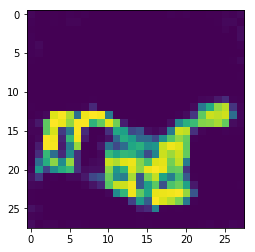

In [22]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights('./run/0006/weights/weights.h5')